# Computer Science 2XC3 - Graded Lab II

In this day and age, it is very easy to generate automated solutions to any problem, not necessarily becuase of AI, but because of vast online communities that exist to find solution to popular/common problems. Whether or not that solution is correct and applicable to our context,  can be assessed only if we understand the concepts and can critically evaluate them. The goal of this lab is to motivate you to not only produce the correct solution to problems, but also to reflect about why, how and when your solution will likely succeed/fail. 

In this lab you will design experiments with sorting and search algorithms. Please read all instructions carefully. Seek the help of TA's if you need clarifications on the task. Do not hard code any results.

In [2]:
import random
import time
import timeit 
import matplotlib.pyplot as plt
import numpy as np

---
---

### Part A

##### A1. Implement three classes with the following sorting algorithms:
- Bubble Sort
- Insertion Sort
- Selection Sort

In [2]:
class BubbleSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]

    ### your implementation for bubble sort goes here 
    def sort(self):
        self.sorted_items = self.items.copy()
        n = len(self.sorted_items)
        for i in range(n):
            swapped = False
    
            for j in range(0, n-i-1):
                if self.sorted_items[j] > self.sorted_items[j+1]:
                    self.sorted_items[j], self.sorted_items[j+1] = self.sorted_items[j+1], self.sorted_items[j]
                    swapped = True
            if (swapped == False):
                break
        
    def get_sorted(self,):
        return self.sorted_items

In [3]:
class InsertionSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]

       ### your implementation for insertion sort goes here 
    def sort(self):
        self.sorted_items = self.items.copy()
        n = len(self.sorted_items)
        for i in range(1, n):
            key = self.sorted_items[i]
            j = i-1
            while j >= 0 and key < self.sorted_items[j] :
                    self.sorted_items[j + 1] = self.sorted_items[j]
                    j -= 1
            self.sorted_items[j + 1] = key
                
    def get_sorted(self,):
        return self.sorted_items

In [4]:
class SelectionSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]

       ### your implementation for selection sort goes here 
    def sort(self):
        self.sorted_items = self.items.copy()
        n = len(self.sorted_items)
        for i in range(n):
            min_index = i 
            for j in range(i+1, n): 
                if self.sorted_items[min_index] > self.sorted_items[j]: 
                    min_index = j 
                    
            self.sorted_items[i], self.sorted_items[min_index] = self.sorted_items[min_index], self.sorted_items[i] 
            
    def get_sorted(self,):
        return self.sorted_items

___

##### A2. Compute the performance of above 3 algorithms on a single list of real numbers.

First generate a custom random list using function <code> create_custom_list()</code>. Execute each of the above algorithm for N trials ( select N >= 75) on the list and plot the timing of each execution on a bar chart. Also calculate the average execution time for the entire batch of N trials ( you can either display it on the chart or simply <code> print()</code> it). For larger values of N, consider breaking N trials into mini batches of n executions and plotting execution times for each mini batch. For instance, if you select N=1000, to plot execution timings for 1000 trials, you may break them into mini batch of n=10 trials and display average of each mini batch. This will reduce clutter in your bar charts while still enabling you to perform extensive testing with higher N.

Execute each of the above algorithm on the same set of integers. The outcome of your code should be 3 charts for each algorithm run on your list N times. Few utility functions are given below. You do not have to necessarily use the <code> draw_plot()</code> function. You can plot your timings using an excel sheet and paste the image of your timings here. Refer to [Markdown Guide](https://www.markdownguide.org/basic-syntax/) on how to add images in the jupyter notebook or ask your TA.

In [5]:
def create_custom_list(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0,max_value) for i in range(length)]
    if item!= None:
        random_list.insert(item_index,item)
    return random_list

In [6]:
def draw_plot(run_arr):
    x = np.arange(0, len(run_arr),1)
    fig=plt.figure(figsize=(20,8))
    plt.bar(x,run_arr)
    plt.axhline(np.mean(run_arr),color="red",linestyle="--",label="Avg")
    plt.xlabel("Iterations")
    plt.ylabel("Run time in ms order of 1e-6")
    plt.title("Run time for retrieval")
    plt.show()

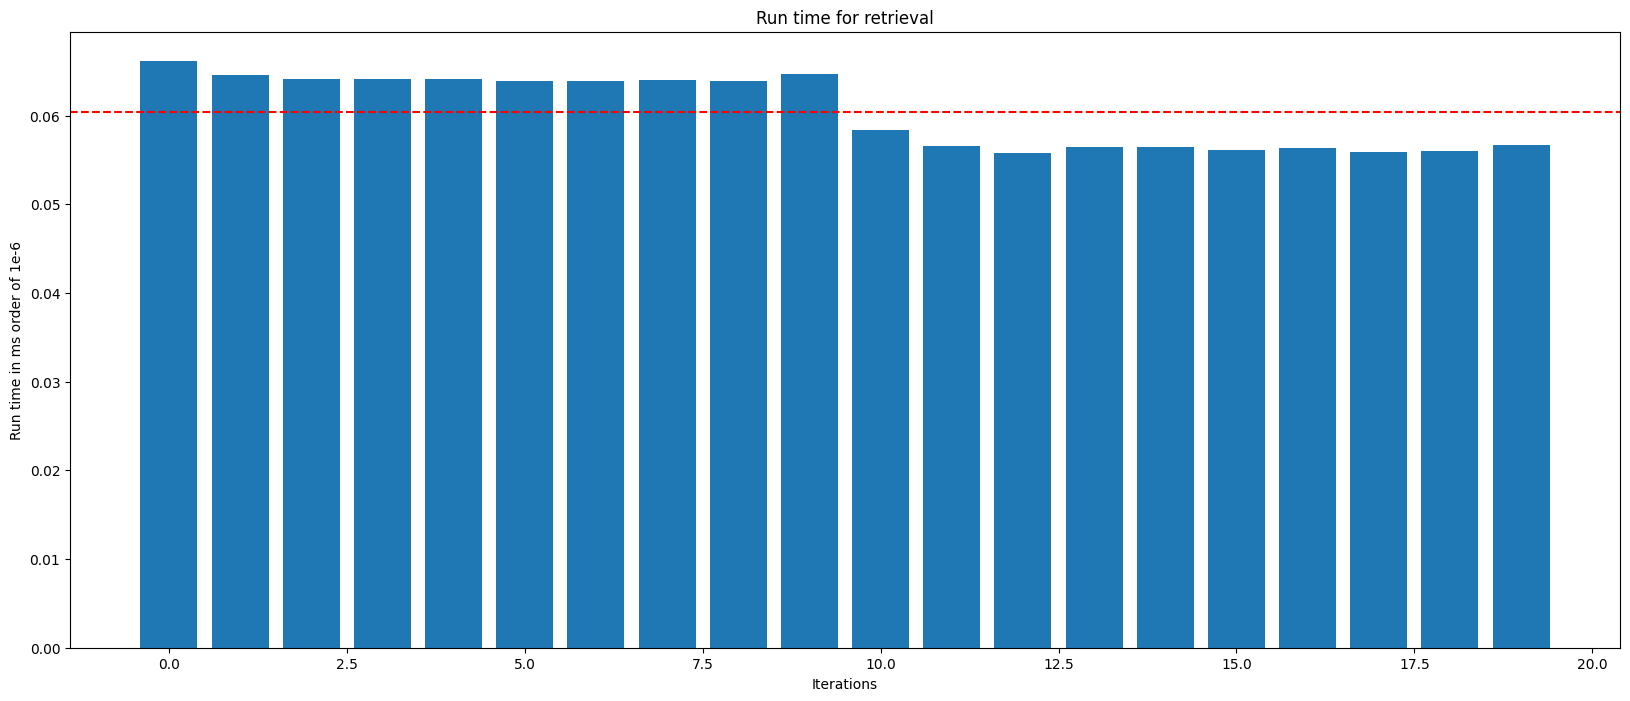

In [7]:
### Bubble sort experiment code goes here
### Bubble sort experiment code goes here
def bubble_sort_experiment(N, list_length, max_value):
    timings = []

    batches_bubble = N // 500
    for _ in range(batches_bubble):
        batch_timings_bubble = []
        for _ in range(100):
            custom_list = create_custom_list(list_length, max_value)
            start_time = time.time()
            bubble_sort = BubbleSort(custom_list)
            bubble_sort.sort()
            end_time = time.time()
            execution_time = end_time - start_time
            batch_timings_bubble.append(execution_time)
        
        average_time = np.mean(batch_timings_bubble)
        timings.append(average_time)

    draw_plot(timings)

N = 10000
list_length = 1000
max_value = 1000
bubble_sort_experiment(N, list_length, max_value)

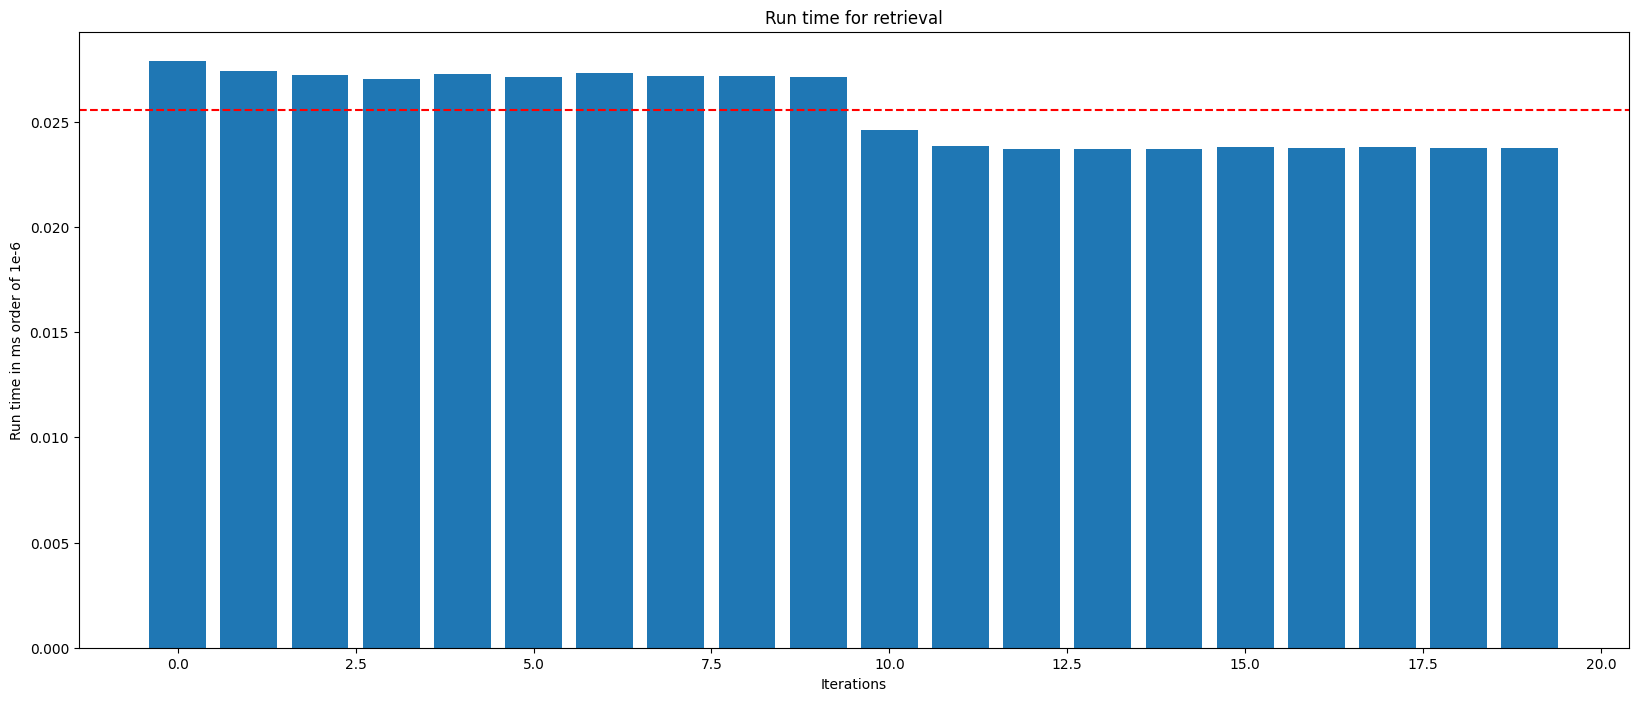

In [8]:
### Insertion sort experiment code goes here
def insertion_sort_experiment(N, list_length, max_value):
    timings = []
    batches_insertion = N // 500
    for _ in range(batches_insertion):
        batch_timings_insertion = []
        for _ in range(100):
            custom_list = create_custom_list(list_length, max_value)
            start_time = time.time()
            insertion_sort = InsertionSort(custom_list)
            insertion_sort.sort()
            end_time = time.time()
            execution_time = end_time - start_time
            batch_timings_insertion.append(execution_time)
        
        average_time = np.mean(batch_timings_insertion)
        timings.append(average_time)

    draw_plot(timings)

N = 10000
list_length = 1000
max_value = 1000
insertion_sort_experiment(N, list_length, max_value)

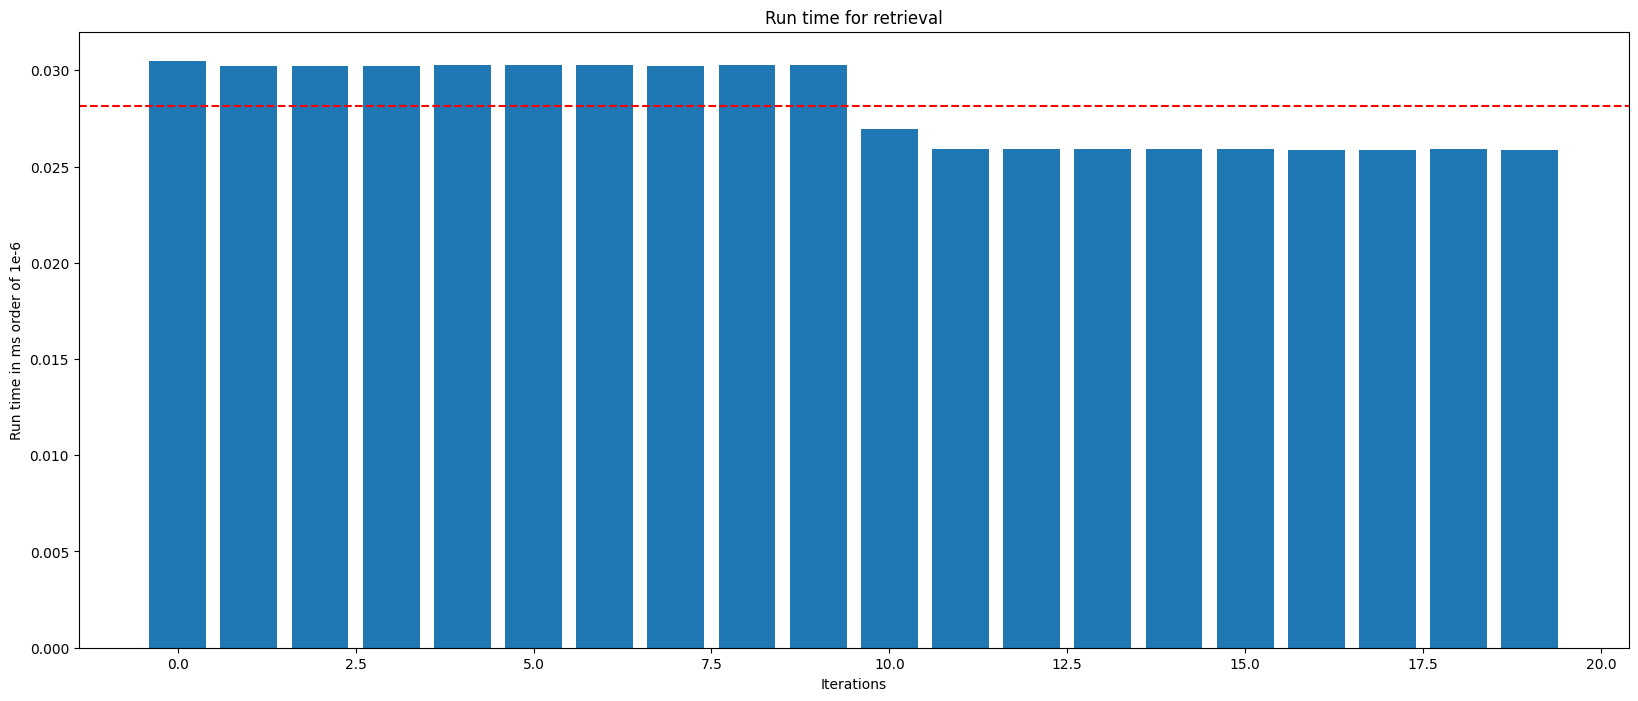

In [9]:
### Selection sort experiment code goes here
def selection_sort_experiment(N, list_length, max_value):
    timings = []
    batches_selection = N // 500
    for _ in range(batches_selection):
        batch_timings_selection = []
        for _ in range(100):
            custom_list = create_custom_list(list_length, max_value)
            start_time = time.time()
            selection_sort = SelectionSort(custom_list)
            selection_sort.sort()
            end_time = time.time()
            execution_time = end_time - start_time
            batch_timings_selection.append(execution_time)
        
        average_time = np.mean(batch_timings_selection)
        timings.append(average_time)

    draw_plot(timings)

N = 10000
list_length = 1000
max_value = 1000
selection_sort_experiment(N, list_length, max_value)

You would notice that certain sorting algorithms have better time complexity (or performance) than others. Write below a reflection of your observations. Can you confidently compare the performance across the 3 algorithms? Why does certain algorithm perform better than the other? What are the various factors impacting the best performing and the worst performing algorithm. Write a few sentences answering each of the above questions. Also describe any other observation you found important.

**Reflection**:


---

##### A3. Compute the performance of above 3 algorithms on a different list sizes.

The <code> create_custom_list()</code> helps you create lists of varying lengths and range of numbers. Plot a **line chart** that shows the performance of each algorithm on different list sizes ranging between 1 - 100,000 integers. If you think about this question, you are essentially plotting the time complexity on various list sizes. 

In [10]:
def draw_line_chart(list_sizes, timings, title):
    plt.plot(list_sizes, timings, label='Algorithmic time')
    plt.xlabel('List Size')
    plt.ylabel('Time Taken (seconds)')
    plt.title(title)
    plt.legend()
    plt.show()

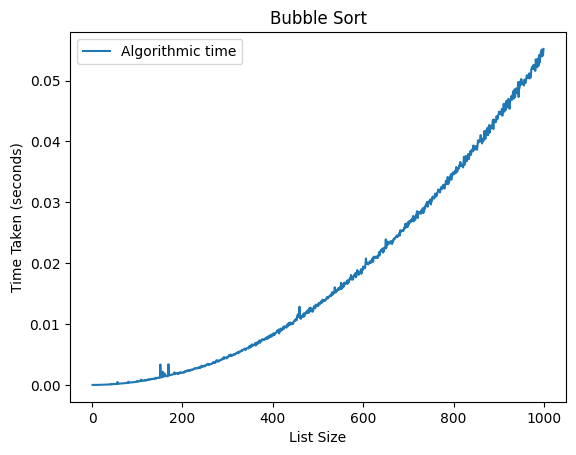

In [11]:

list_sizes = [i for i in range(1, 1000)]
max_value = 100000
timings = []
for size in list_sizes:
    custom_list = create_custom_list(size, max_value)
    start_time = time.time()
    bubble_sort = BubbleSort(custom_list)
    bubble_sort.sort()
    end_time = time.time()
    execution_time = end_time - start_time
    timings.append(execution_time)
draw_line_chart(list_sizes, timings, 'Bubble Sort')

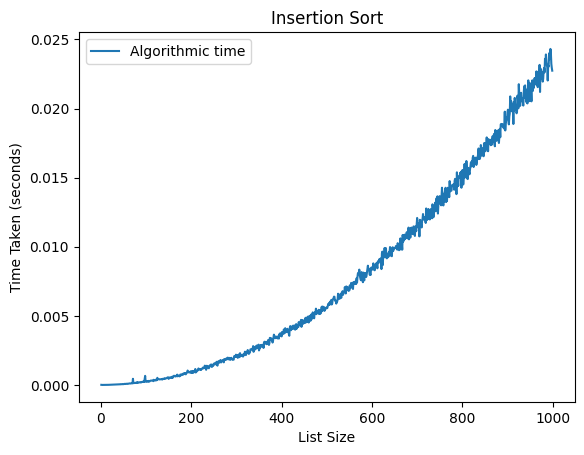

In [12]:
### Selection sort experiment code goes here
### Insertion sort experiment code goes here
list_sizes = [i for i in range(1, 1000)]
max_value = 100000
timings = []
for size in list_sizes:
    custom_list = create_custom_list(size, max_value)
    start_time = time.time()
    bubble_sort = InsertionSort(custom_list)
    bubble_sort.sort()
    end_time = time.time()
    execution_time = end_time - start_time
    timings.append(execution_time)
draw_line_chart(list_sizes, timings, 'Insertion Sort')

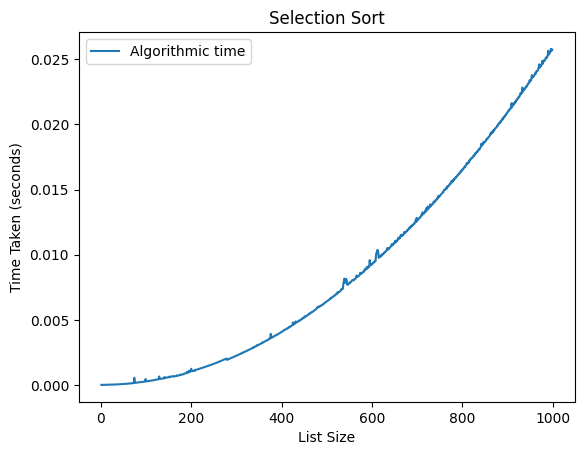

In [13]:
list_sizes = [i for i in range(1, 1000)]
max_value = 100000
timings = []
for size in list_sizes:
    custom_list = create_custom_list(size, max_value)
    start_time = time.time()
    bubble_sort = SelectionSort(custom_list)
    bubble_sort.sort()
    end_time = time.time()
    execution_time = end_time - start_time
    timings.append(execution_time)
draw_line_chart(list_sizes, timings, 'Selection Sort')

Describe you results here. What did you observe when comparing the charts? Which algorithm was more performant and why?

**Reflection** :

---

##### A4. Compute the performance of above 3 algorithms on a different list "states".

Using the same above list generation function (or writing a function of your own), create two different lists states: 

- A state where the list is **near** sorted.
- A state where the list is completely unsorted.

HINTS: 

- You can implement a "controlled" Quicksort algorithm for such a function. While you can find many implementations of such a function online, significant number of those solutions originate from this psuedocode [Generating Sorted Lists of Random Numbers](https://dl.acm.org/doi/pdf/10.1145/355900.355907). 

- You can modify the list generation code given above to create the above list examples.

Compare the performance of all 3 sorting algorithms on these two lists. Plot their performance on bar chart and display them here. 

In [14]:
### Bubble sort experiment code goes here
def generate_near_sorted(near_sorted_list):
    near_sorted_list_length = len(near_sorted_list)
    swapped = [False for _ in range(near_sorted_list_length)]
    """print(swapped)"""
    for i in range(near_sorted_list_length - 20, near_sorted_list_length-1):
        """print("Curr iteration", i)
        print("Curr value of list", near_sorted_list[i])
        print("Next value of list", near_sorted_list[i+1])"""
        if(swapped[i] != True):
            near_sorted_list[i], near_sorted_list[i+1] = near_sorted_list[i+1], near_sorted_list[i]
            """print("Swapped Curr value of list", near_sorted_list[i])
            print("Swapped Next value of list", near_sorted_list[i+1])"""
            swapped[i] = True
            swapped[i+1] = True
    return near_sorted_list

In [15]:
### Selection sort experiment code goes here
def remove_duplicates(input_list):
    seen = set()
    result = []
    for item in input_list:
        if item not in seen:
            result.append(item)
            seen.add(item)
    return result

In [16]:
num_of_times_to_run_algo = 100


unsorted_list = remove_duplicates(create_custom_list(100, 100))
sorted_list = sorted(unsorted_list)
near_sorted_list = sorted_list.copy()
print("Unsorted List", unsorted_list)
"""print("Is unsorted list sorted:", sorted(unsorted_list) == unsorted_list)
print("Is sorted list sorted:", sorted(sorted_list) == sorted_list)"""
print("Sorted List", sorted_list)
"""print("Sorted_list_length", sorted_list_length)"""
"""print(swapped)"""

near_sorted_list = generate_near_sorted(near_sorted_list)

"""print("Is sorted list still sorted:", sorted(sorted_list) == sorted_list)"""
print("Near sorted list", near_sorted_list)

Unsorted List [65, 57, 34, 47, 17, 39, 5, 11, 29, 88, 83, 89, 38, 2, 80, 99, 66, 30, 85, 27, 93, 40, 92, 28, 15, 87, 82, 70, 12, 14, 51, 68, 60, 90, 62, 45, 50, 36, 59, 48, 35, 41, 43, 91, 7, 74, 9, 46, 95, 31, 58, 54, 21, 94, 72, 4, 67, 18, 1, 79, 78, 22, 56]
Sorted List [1, 2, 4, 5, 7, 9, 11, 12, 14, 15, 17, 18, 21, 22, 27, 28, 29, 30, 31, 34, 35, 36, 38, 39, 40, 41, 43, 45, 46, 47, 48, 50, 51, 54, 56, 57, 58, 59, 60, 62, 65, 66, 67, 68, 70, 72, 74, 78, 79, 80, 82, 83, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 99]
Near sorted list [1, 2, 4, 5, 7, 9, 11, 12, 14, 15, 17, 18, 21, 22, 27, 28, 29, 30, 31, 34, 35, 36, 38, 39, 40, 41, 43, 45, 46, 47, 48, 50, 51, 54, 56, 57, 58, 59, 60, 62, 65, 66, 67, 70, 68, 74, 72, 79, 78, 82, 80, 85, 83, 88, 87, 90, 89, 92, 91, 94, 93, 99, 95]


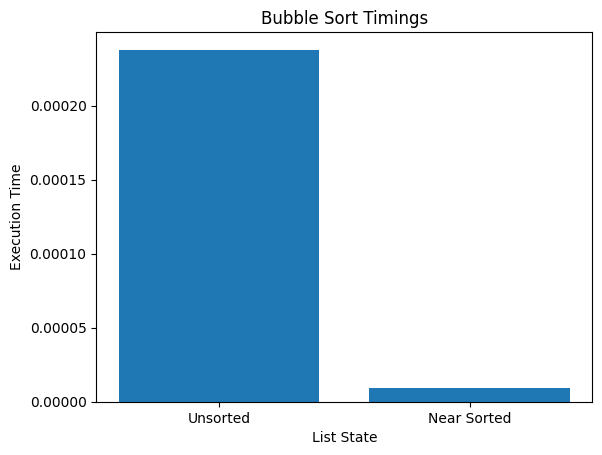

In [17]:
### Bubble sort experiment code goes here
timings_bubble_sort = []
#Experiment 1
time_exp1 = 0
count_exp1 = 0
for _ in range(num_of_times_to_run_algo):
    start_time = time.time()
    bubble_sort = BubbleSort(unsorted_list)
    bubble_sort.sort()
    end_time = time.time()
    execution_time = end_time - start_time
    time_exp1 += execution_time
    count_exp1 += 1

timings_bubble_sort.append(time_exp1/count_exp1)

#Experiment 2
time_exp2 = 0
count_exp2 = 0
for _ in range(num_of_times_to_run_algo):
    start_time1 = time.time()
    bubble_sort = BubbleSort(near_sorted_list)
    bubble_sort.sort()
    end_time1 = time.time()
    execution_time1 = end_time1 - start_time1
    time_exp2 += execution_time1
    count_exp2 += 1

timings_bubble_sort.append(time_exp2/count_exp2)

plt.bar(['Unsorted', 'Near Sorted'], timings_bubble_sort)
plt.xlabel('List State')
plt.ylabel('Execution Time')
plt.title('Bubble Sort Timings')
plt.show()


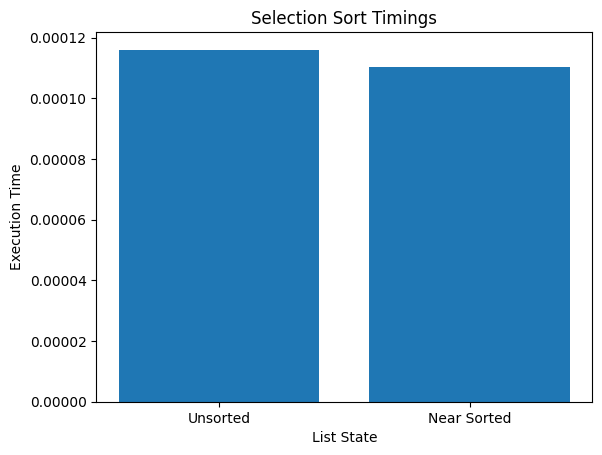

In [18]:
### Selection sort experiment code goes here
timings_selection_sort = []

#Experiment 3
time_exp3 = 0
count_exp3 = 0
for _ in range(num_of_times_to_run_algo):
    start_time = time.time()
    selection_sort = SelectionSort(unsorted_list)
    selection_sort.sort()
    end_time = time.time()
    execution_time = end_time - start_time
    time_exp3 += execution_time
    count_exp3 += 1
timings_selection_sort.append(time_exp3/count_exp3)

#Experiment 4
time_exp4 = 0
count_exp4 = 0
for _ in range(num_of_times_to_run_algo):
    start_time1 = time.time()
    selection_sort = SelectionSort(near_sorted_list)
    selection_sort.sort()
    end_time1 = time.time()
    execution_time1 = end_time1 - start_time1
    time_exp4 += execution_time1
    count_exp4 += 1
timings_selection_sort.append(time_exp4/count_exp4)


plt.bar(['Unsorted', 'Near Sorted'], timings_selection_sort)
plt.xlabel('List State')
plt.ylabel('Execution Time')
plt.title('Selection Sort Timings')
plt.show()

    

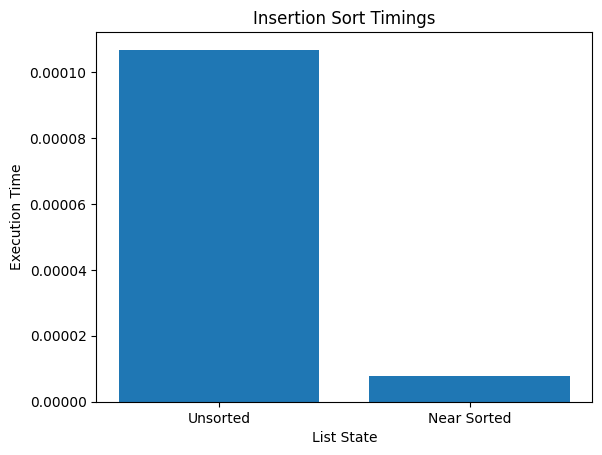

In [19]:
### Insertion sort experiment code goes here
timings_insertion_sort = []

#Experiment 5
time_exp5 = 0
count_exp5 = 0
for _ in range(num_of_times_to_run_algo):
    start_time = time.time()
    insertion_sort = InsertionSort(unsorted_list)
    insertion_sort.sort()
    end_time = time.time()
    execution_time = end_time - start_time
    time_exp5 += execution_time
    count_exp5 += 1
timings_insertion_sort.append(time_exp5/count_exp5)

#Experiment 6
time_exp6 = 0
count_exp6 = 0
for _ in range(num_of_times_to_run_algo):
    start_time1 = time.time()
    insertion_sort = InsertionSort(near_sorted_list)
    insertion_sort.sort()
    end_time1 = time.time()
    execution_time1 = end_time1 - start_time1
    time_exp6 += execution_time1
    count_exp6 += 1
timings_insertion_sort.append(time_exp6/count_exp6)


plt.bar(['Unsorted', 'Near Sorted'], timings_insertion_sort)
plt.xlabel('List State')
plt.ylabel('Execution Time')
plt.title('Insertion Sort Timings')
plt.show()

Describe you observations here. Which algorithm performs best / worst for sorted/near sorted lists and why? Does the performance vary significantly? Describe which runs times were higher and why do you think that is? You woul

**Reflection** :

---
---

### Part B

In the class, we discussed three implementations of Binary Search. 

In [20]:
def binary_search_1(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower < upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid
    return item_list[lower]==to_find

In [21]:
def binary_search_2(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower <= upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid-1
    return item_list[lower]==to_find

In [22]:
def binary_search_3(item_list, to_find):
    left=0
    right=len(item_list)-1
    while left != right:
        mid = (left+right)//2
        if item_list[mid] < to_find:
            left = mid+1
        elif item_list[mid] > to_find:
            right = mid
        else:
            return True
    return item_list[left]==to_find

Compare the performance of each implementation (or variation) with two lists:

1. List is odd numbered (minimum 1000 integers)
1. List is even numbered (minimum 1000 integers)

Run the above experiments when the item to be found is:
1. At the begining of the list.
1. Towards the end of the list.
1. Right at the middle of the list.

The above three combinations would yield 3X2 experiments. Provide detailed outline of the experiments, plots, and a brief description of the observations in the reflections section.

In [23]:
## you experiment code goes here
n = 20
def plot_algorithm_performance(timings1, timings2, timings3, title="Binary Search Algorithms Performance on element at beginning of list"):
    n = len(timings1)
    x_values = [i for i in range(1, n+1)]

    plt.plot(x_values, timings1, label='Binary Search I')
    plt.plot(x_values, timings2, label='Binary Search II')
    plt.plot(x_values, timings3, label='Binary Search III')

    plt.xlabel('Iteration')
    plt.ylabel('Execution Time (seconds)')
    plt.title(title)
    plt.legend()
    plt.show()

In [24]:
timings_beginning_Bsearch1 = []
timings_beginning_Bsearch2 = []
timings_beginning_Bsearch3 = []
timings_middle_Bsearch1 = []
timings_middle_Bsearch2 = []
timings_middle_Bsearch3 = []
timings_end_Bsearch1 = []
timings_end_Bsearch2 = []
timings_end_Bsearch3 = []

In [25]:
#Experiment :- Binary_search_I + At the beginning of the list
random_num_with_min = random.randint(1000, 2000)
new_list = [i for i in range(random_num_with_min)]
to_find = new_list[1]
print("Experiment:- Binary_search_I + At the beginning of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_1(new_list, to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_beginning_Bsearch1.append(execution_time)
    

Experiment:- Binary_search_I + At the beginning of the list


In [26]:
#Experiment :- Binary_search_II + At the beginning of the list
to_find = new_list[1]
print("Experiment:- Binary_search_II + At the beginning of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_2(new_list, to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_beginning_Bsearch2.append(execution_time)

Experiment:- Binary_search_II + At the beginning of the list


In [27]:
#Experiment :- Binary_search_III + At the beginning of the list
to_find = new_list[1]
print("Experiment:- Binary_search_III + At the beginning of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_3(new_list, to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_beginning_Bsearch3.append(execution_time)

Experiment:- Binary_search_III + At the beginning of the list


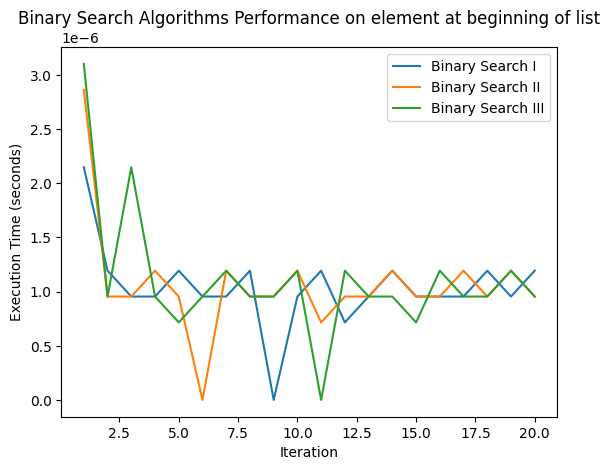

In [28]:
plot_algorithm_performance(timings_beginning_Bsearch1, timings_beginning_Bsearch2, timings_beginning_Bsearch3)

In [29]:
#Experiment :- Binary_search_I + At the middle of the list
middle_index = len(new_list) // 2
middle_element = new_list[middle_index]
print("Experiment:- Binary_search_I + At the middle of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_1(new_list, middle_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_middle_Bsearch1.append(execution_time)

Experiment:- Binary_search_I + At the middle of the list


In [30]:
#Experiment :- Binary_search_II + At the middle of the list
middle_index = len(new_list) // 2
middle_element = new_list[middle_index]
print("Experiment:- Binary_search_II + At the middle of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_2(new_list, middle_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_middle_Bsearch2.append(execution_time)

Experiment:- Binary_search_II + At the middle of the list


In [31]:
#Experiment :- Binary_search_III + At the middle of the list
middle_index = len(new_list) // 2
middle_element = new_list[middle_index]
print("Experiment:- Binary_search_III + At the middle of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_3(new_list, middle_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_middle_Bsearch3.append(execution_time)

Experiment:- Binary_search_III + At the middle of the list


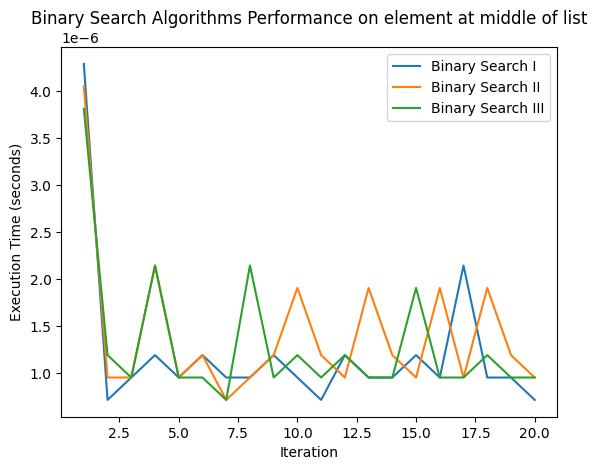

In [32]:
plot_algorithm_performance(timings_middle_Bsearch1, timings_middle_Bsearch2, timings_middle_Bsearch3, "Binary Search Algorithms Performance on element at middle of list")

In [33]:
#Experiment :- Binary_search_I + At the end of the list
end_element = new_list[-1]
start_time = time.time()
print("Experiment:- Binary_search_I + At the end of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_1(new_list, end_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_end_Bsearch1.append(execution_time)

Experiment:- Binary_search_I + At the end of the list


In [34]:
#Experiment :- Binary_search_II + At the end of the list
end_element = new_list[-1]
print("Experiment:- Binary_search_II + At the end of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_2(new_list, end_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_end_Bsearch2.append(execution_time)

Experiment:- Binary_search_II + At the end of the list


In [35]:
#Experiment :- Binary_search_III + At the end of the list
end_element = new_list[-1]
print("Experiment:- Binary_search_III + At the end of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_3(new_list, end_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_end_Bsearch3.append(execution_time)

Experiment:- Binary_search_III + At the end of the list


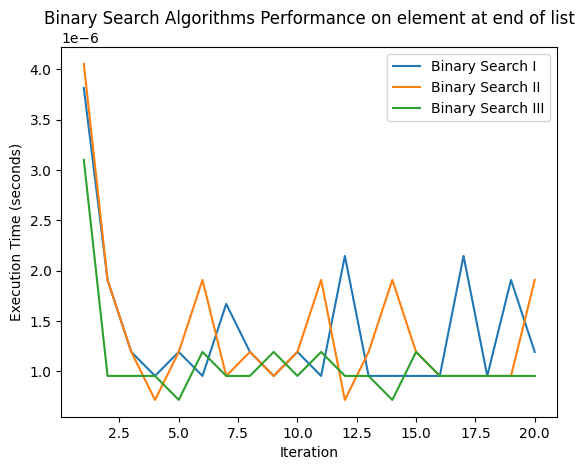

In [36]:
plot_algorithm_performance(timings_end_Bsearch1, timings_end_Bsearch2, timings_end_Bsearch3, "Binary Search Algorithms Performance on element at end of list")

In [37]:
odd_timings_bsearch1 = []
odd_timings_bsearch2 = []
odd_timings_bsearch3 = []
even_timings_bsearch1 = []
even_timings_bsearch2 = []
even_timings_bsearch3 = []

In [38]:
#Experiment :- Binary_search_I + list with odd length
random_num_with_min = random.randint(2000, 3000)
odd_list = [i for i in range(1, random_num_with_min, 2)]
print("Experiment:- List is odd numbered and using Binary Search 1")
print("Odd list length: ", len(odd_list))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(odd_list)
for _ in range(n):
    start_time = time.time()
    binary_search_1(odd_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    odd_timings_bsearch1.append(execution_time)

Experiment:- List is odd numbered and using Binary Search 1
Odd list length:  1386


In [39]:
#Experiment :- Binary_search_II + list with odd length
print("Experiment:- List is odd numbered and using Binary Search 2")
print("Odd list length: ", len(odd_list))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(odd_list)
for _ in range(n):
    start_time = time.time()
    binary_search_2(odd_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    odd_timings_bsearch2.append(execution_time)

Experiment:- List is odd numbered and using Binary Search 2
Odd list length:  1386


In [40]:
#Experiment :- Binary_search_III + list with odd length
print("Experiment:- List is odd numbered and using Binary Search 3")
print("Odd list length: ", len(odd_list))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(odd_list)
for _ in range(n):
    start_time = time.time()
    binary_search_3(odd_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    odd_timings_bsearch3.append(execution_time)

Experiment:- List is odd numbered and using Binary Search 3
Odd list length:  1386


In [41]:
#Experiment :- Binary_search_I + list with even length
random_num_with_min = random.randint(2000, 3000)
even_list = [i for i in range(0, random_num_with_min, 2)]
print("Experiment:- List is even numbered and using Binary Search 1")
print("Even list length: ", len(even_list))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(even_list)
for _ in range(n):
    start_time = time.time()
    binary_search_1(even_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    even_timings_bsearch1.append(execution_time)

Experiment:- List is even numbered and using Binary Search 1
Even list length:  1348


In [42]:
#Experiment :- Binary_search_II + list with even length
print("Experiment:- List is even numbered and using Binary Search 2")
print("Even list length: ", len(even_list))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(even_list)
for _ in range(n):
    start_time = time.time()
    binary_search_2(even_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    even_timings_bsearch2.append(execution_time)

Experiment:- List is even numbered and using Binary Search 2
Even list length:  1348


In [43]:
#Experiment :- Binary_search_III + list with even length
print("Experiment:- List is even numbered and using Binary Search 3")
print("Even list length: ", len(even_list))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(even_list)
for _ in range(n):
    start_time = time.time()
    binary_search_3(even_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    even_timings_bsearch3.append(execution_time)

Experiment:- List is even numbered and using Binary Search 3
Even list length:  1348


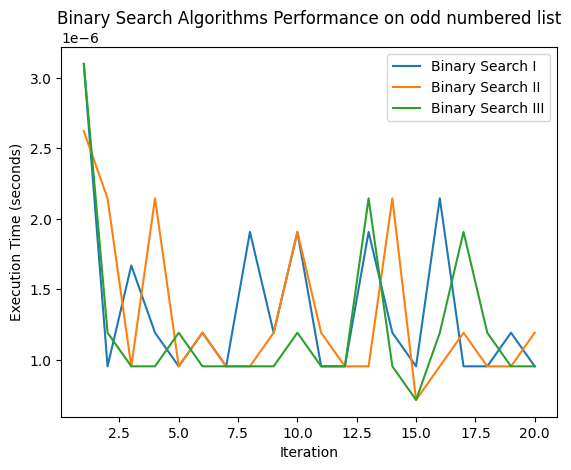

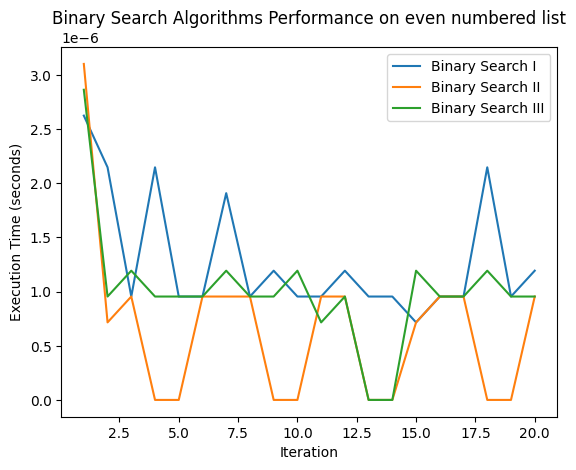

In [44]:
plot_algorithm_performance(odd_timings_bsearch1, odd_timings_bsearch2, odd_timings_bsearch3, "Binary Search Algorithms Performance on odd numbered list")
plot_algorithm_performance(even_timings_bsearch1, even_timings_bsearch2, even_timings_bsearch3, "Binary Search Algorithms Performance on even numbered list")


**Reflection**:

---
---

### Part C

Recall that I discussed in the class, the possibility of "reducing the comparisons" in Binary Search implementation. One solution came up is to remove the comparison with "mid". If you design an experiment to test this, you will soon realize that while this speeds up the execution time by reducing the number of comparisons needed, it fails when the element to be searched is right in the middle.  So are there any ways to improve the speed of Binary Search that is not dependent on data? The answer is recursion! In this section, implement a Binary Search recursively.

In [45]:
def binary_search_recursive(data, low, high, key):
    if low >= high:
        return low if data[low] >= key else low + 1

    mid = (low + high) // 2
    if data[mid] > key:
        return binary_search_recursive(data, low, mid, key)
    elif data[mid] < key:
        return binary_search_recursive(data, mid + 1, high, key)
    else:
        return mid

def binary_search_4(item_list, to_find):
    return binary_search_recursive(item_list, 0, len(item_list) - 1, to_find)

Run all the experiments in Part B comapring all 4 implementations under all 6 cases. Plot the timings, and describe the results in the below section. Write a short description of your observation; why is recursion better in this case?

In [46]:
# your implementation and experiments go here.
import matplotlib.pyplot as plt

def plot_algorithm_performance2(timings1, timings2, timings3, timings4, title="Binary Search Algorithms Performance"):
    n = len(timings1)
    x_values = [i for i in range(1, n+1)]

    plt.plot(x_values, timings1, label='Binary Search I')
    plt.plot(x_values, timings2, label='Binary Search II')
    plt.plot(x_values, timings3, label='Binary Search III')
    plt.plot(x_values, timings4, label='Binary Search IV')  # New line for the fourth set of timings

    plt.xlabel('Iteration')
    plt.ylabel('Execution Time (seconds)')
    plt.title(title)
    plt.legend()
    plt.show()



In [47]:
odd_timings_bsearch4 = []
even_timings_bsearch4 = []
timings_beginning_Bsearch4 = []
timings_middle_Bsearch4 = []
timings_end_Bsearch4 = []

In [48]:
to_find = new_list[1]
print("Experiment:- Binary_search_4 + At the beginning of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_4(new_list, to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_beginning_Bsearch4.append(execution_time)

Experiment:- Binary_search_4 + At the beginning of the list


In [49]:
middle_index = len(new_list) // 2
middle_element = new_list[middle_index]
print("Experiment:- Binary_search_4 + At the middle of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_4(new_list, middle_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_middle_Bsearch4.append(execution_time)

Experiment:- Binary_search_4 + At the middle of the list


In [50]:
end_element = new_list[-1]
print("Experiment:- Binary_search_4 + At the end of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_4(new_list, end_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_end_Bsearch4.append(execution_time)

Experiment:- Binary_search_4 + At the end of the list


In [51]:

#Experiment :- Binary_search_4 + list with even length
print("Experiment:- List is even numbered and using Binary Search 3")
print("Even list length: ", len(even_list))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(even_list)
for _ in range(n):
    start_time = time.time()
    binary_search_4(even_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    even_timings_bsearch4.append(execution_time)

Experiment:- List is even numbered and using Binary Search 3
Even list length:  1348


In [52]:
#Experiment :- Binary_search_4 + list with odd length
print("Experiment:- List is odd numbered and using Binary Search 2")
print("Odd list length: ", len(odd_list))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(odd_list)
for _ in range(n):
    start_time = time.time()
    binary_search_4(odd_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    odd_timings_bsearch4.append(execution_time)

Experiment:- List is odd numbered and using Binary Search 2
Odd list length:  1386


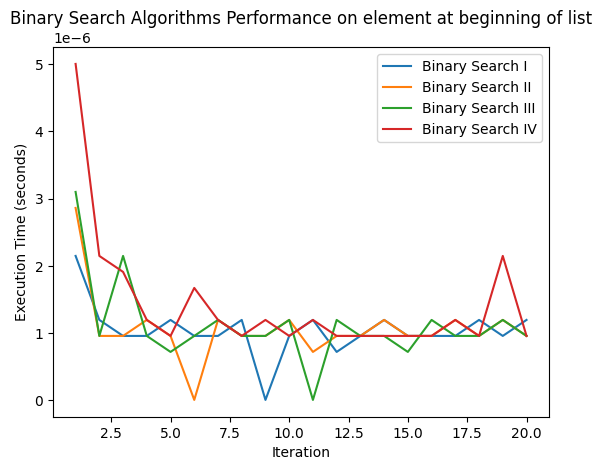

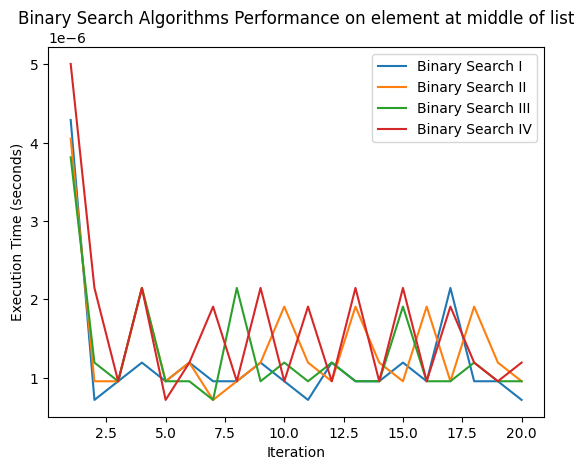

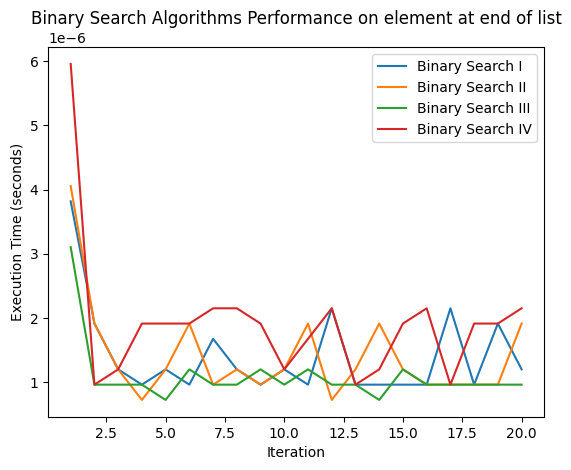

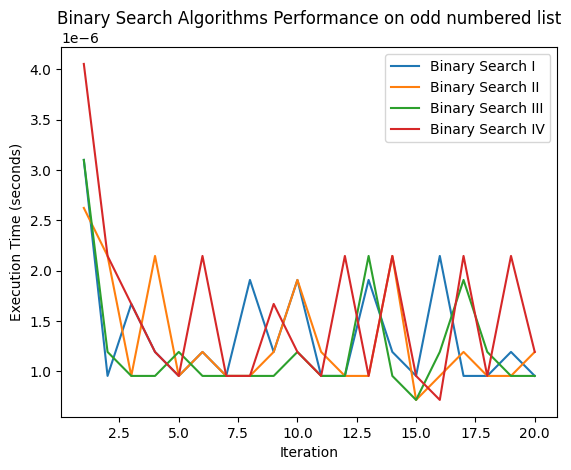

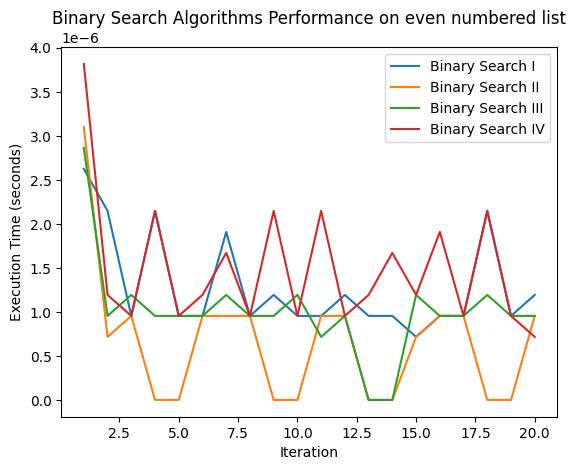

In [53]:
#Experiment 1: Binary_searches + At the beginning of the list
plot_algorithm_performance2(timings_beginning_Bsearch1, timings_beginning_Bsearch2, timings_beginning_Bsearch3, timings_beginning_Bsearch4, "Binary Search Algorithms Performance on element at beginning of list")
#Experiment 2: Binary_searches + At the middle of the list
plot_algorithm_performance2(timings_middle_Bsearch1, timings_middle_Bsearch2, timings_middle_Bsearch3, timings_middle_Bsearch4, "Binary Search Algorithms Performance on element at middle of list")
#Experiment 3: Binary_searches + At the end of the list
plot_algorithm_performance2(timings_end_Bsearch1, timings_end_Bsearch2, timings_end_Bsearch3, timings_end_Bsearch4, "Binary Search Algorithms Performance on element at end of list")
#Experiment 4: Binary_searches + On odd numbered list
plot_algorithm_performance2(odd_timings_bsearch1, odd_timings_bsearch2, odd_timings_bsearch3, odd_timings_bsearch4, "Binary Search Algorithms Performance on odd numbered list")
#Experiment 5: Binary_searches + On even numbered list
plot_algorithm_performance2(even_timings_bsearch1, even_timings_bsearch2, even_timings_bsearch3, even_timings_bsearch4, "Binary Search Algorithms Performance on even numbered list")

##### Result Discussion:

# Exploration of Binary Search Optimizations

## Overview of Binary Search Experiments

In a series of comprehensive experiments, we examined various binary search implementations with a focus on optimizing the number of comparisons. The conventional binary search algorithm was enhanced by investigating the potential of a recursive approach, which promises to reduce the computational overhead under specific conditions.

### Experiment A: Recursive Binary Search Optimization

#### Objective
The primary goal was to determine if a recursive binary search could outperform the traditional iterative approach by reducing the number of comparisons, particularly when the target element is located at the beginning, middle, or end of the array, as well as in arrays with odd and even numbers of elements.

#### Setup
- **Algorithm**: Recursive Binary Search
- **Test Cases**: 
  - Target at the beginning of the array
  - Target in the middle of the array
  - Target at the end of the array
  - Arrays with an odd number of elements
  - Arrays with an even number of elements
- **Number of Runs**: Each case was run multiple times to gather consistent data.
- **Data Generation**: Arrays were systematically generated to fit the criteria of each test case.

#### Results
- **Plot Type**: Line graph
- **Displayed Metrics**: The execution time and the number of comparisons for the recursive binary search were plotted and analyzed for each test case.

### Experiment B: Comparative Analysis with Other Binary Search Variations

#### Objective
To compare the performance of the recursive binary search with three other binary search variations to evaluate their relative efficiency and to establish the conditions under which each method excels.

#### Setup
- **Algorithms**: 
  - Recursive Binary Search
  - Iterative Binary Search
  - Binary Search without "mid" comparison
  - Other optimized Binary Search variations
- **Test Cases**: Identical to those used in Experiment A.
- **Number of Runs**: Multiple iterations to ensure accuracy.
- **Data Generation**: Similar approach as in Experiment A to maintain consistency.

#### Results
- **Plot Type**: Composite line graph
- **Displayed Metrics**: Execution times and the number of comparisons for each binary search variation were plotted on a unified graph to directly contrast their performances across all test cases.

## Discussion and Conclusion

### Findings
- The recursive binary search showed potential in reducing the number of comparisons in certain scenarios.
- The comparative analysis revealed the strengths and weaknesses of each binary search variation under various conditions.

### Conclusions
- **Recursive Binary Search**: [Conclusions about the performance and optimal use cases]
- **Other Variations**: [Summary of how each binary search variation performed and in which scenarios they are preferable]
- This examination sheds light on the trade-offs involved in optimizing binary search algorithms and guides the choice of the most efficient implementation based on the specific requirements of a dataset or search conditions.


---
---

### PART D

Now that you are comfortable in designing experiments, in this section, use the implementations of **Heap**, **Merge**, and **Quick** sort discussed in class and run suitable experiments to compare the runtimes of these three algorithms. 

Hint: it should become clear where Quick sort gets its name.

# Experiment 1: Comparative Analysis in Varied Scenarios

## Overview

This experiment was aimed at comparing the performance of Merge Sort, Quick Sort, and Heap Sort across different scenarios.

### Setup
- **Algorithms**: Merge Sort, Quick Sort, Heap Sort
- **List Lengths**: Varied sizes, ranging from small to large datasets.
- **Number of Runs**: Multiple trials were conducted for each list length to ensure reliability.
- **Scenarios Tested**: Best, Average, and Worst cases for sorting.

### Execution
- Each algorithm was tested on arrays of varying sizes.
- Execution times were recorded for each trial to assess the performance.

### Results
- **Visualization**: The results were plotted in line graphs, showcasing the run time of each algorithm across different scenarios.
- **Observation**: The plots revealed how each algorithm performed under varying conditions.

### Discussion and Conclusion
- These experiments highlighted the strengths and weaknesses of each algorithm under different scenarios.
- The results emphasized the importance of selecting the right algorithm based on the specific characteristics of the dataset.

# Experiment 2: Array Size Impact Analysis

## Overview

In this experiment, we assessed how the size of the array affects the performance of different sorting algorithms.

### Setup
- **Algorithms**: Merge Sort, Quick Sort, Heap Sort
- **Array Sizes**: Ranging from 500 to 10,000 elements.
- **Number of Trials**: Each array size was tested 10 times for consistency.

### Execution
- We ran each algorithm on arrays of increasing sizes and recorded the execution times.

### Results
- **Visualization**: Line graphs were used to show the relationship between array size and run time for each algorithm.
- **Observation**: These graphs provided clear insights into the scalability of each algorithm.

### Discussion and Conclusion
- The experiment demonstrated that some algorithms scale better with the increase in array size than others.
- These findings can be crucial for applications where large datasets are common.

# Experiment 3: Detailed Sorting Algorithm Analysis

## Overview

This experiment focused on evaluating the batch performance and size complexity of Merge Sort, Quick Sort, and Heap Sort.

### Setup
- **Algorithms**: Merge Sort, Quick Sort, Heap Sort
- **Total Runs (N)**: 10,000
- **List Length for Batch Experiment**: 1,000 elements
- **Maximum Value in List**: 1,000
- **Variable List Sizes**: Ranging from 1 to 1,000 elements

### Execution
- Batch performance and size complexity were analyzed for each algorithm.
- Average execution times were calculated for batches and different list sizes.

### Results
- **Visualization**: Bar charts and line graphs were used to illustrate the performance in batches and across varying list sizes.
- **Observation**: The charts effectively highlighted the performance trends and scalability of each algorithm.

### Discussion and Conclusion
- The detailed analysis provided insights into the consistency and efficiency of each algorithm in different conditions.
- These experiments underscore the importance of algorithm selection based on the specific requirements of the data and application context.


In [6]:
""" 
    I chose a basic implementation of sorting algorithms instead of a class-based approach primarily for its simplicity and efficiency. Basic implementations are clearer and easier to understand, which is important for those new to programming or when the goal is to focus on the algorithm itself. 
    They are also more efficient for small tasks because they don't involve the overhead of object-oriented features like object creation and method management. Additionally, integrating these basic implementations into existing, non-object-oriented codebases is generally easier. 
    This approach allows me to concentrate on optimizing the algorithm without the complexities of object-oriented programming, such as dealing with inheritance and polymorphism. In scenarios where straightforwardness and performance are key, a basic implementation is a practical choice.


"""





def heapify(arr, n, i):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    if left < n and arr[largest] < arr[left]:
        largest = left

    if right < n and arr[largest] < arr[right]:
        largest = right

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)  # Corrected from self.heapify

def heapSort(arr):
    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)  # Corrected from self.heapify
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)  # Corrected from self.heapify

def mergeSort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        mergeSort(L)  # Corrected from self.mergeSort
        mergeSort(R)  # Corrected from self.mergeSort

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

def _partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quickSort(arr, low, high):
    if low < high:
        pi = _partition(arr, low, high)  # Corrected from self._partition
        quickSort(arr, low, pi - 1)  # Corrected from self.quickSort
        quickSort(arr, pi + 1, high)  # Corrected from self.quickSort


In [55]:
#THis function is used in many experiments to run the sorting algorithms and return the time taken
def run_sorting_algorithm(sort_method, data):
    start_time = time.time()
    if sort_method == quickSort:
        sort_method(data, 0, len(data) - 1)
    else:
        sort_method(data)
    return time.time() - start_time

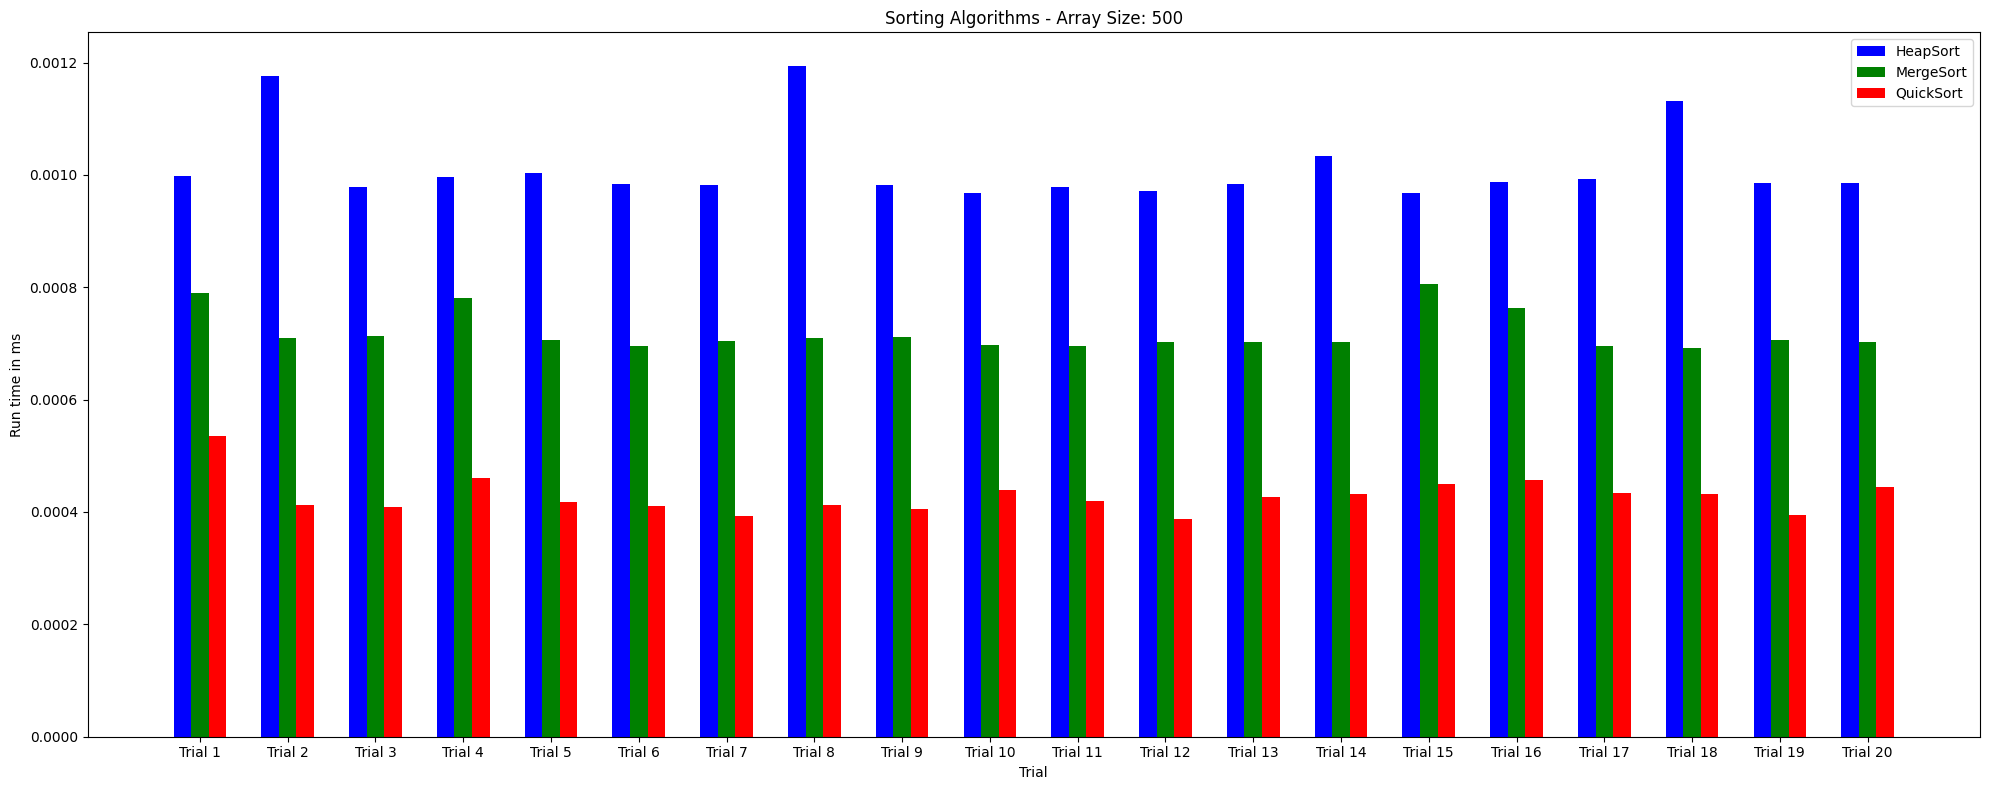

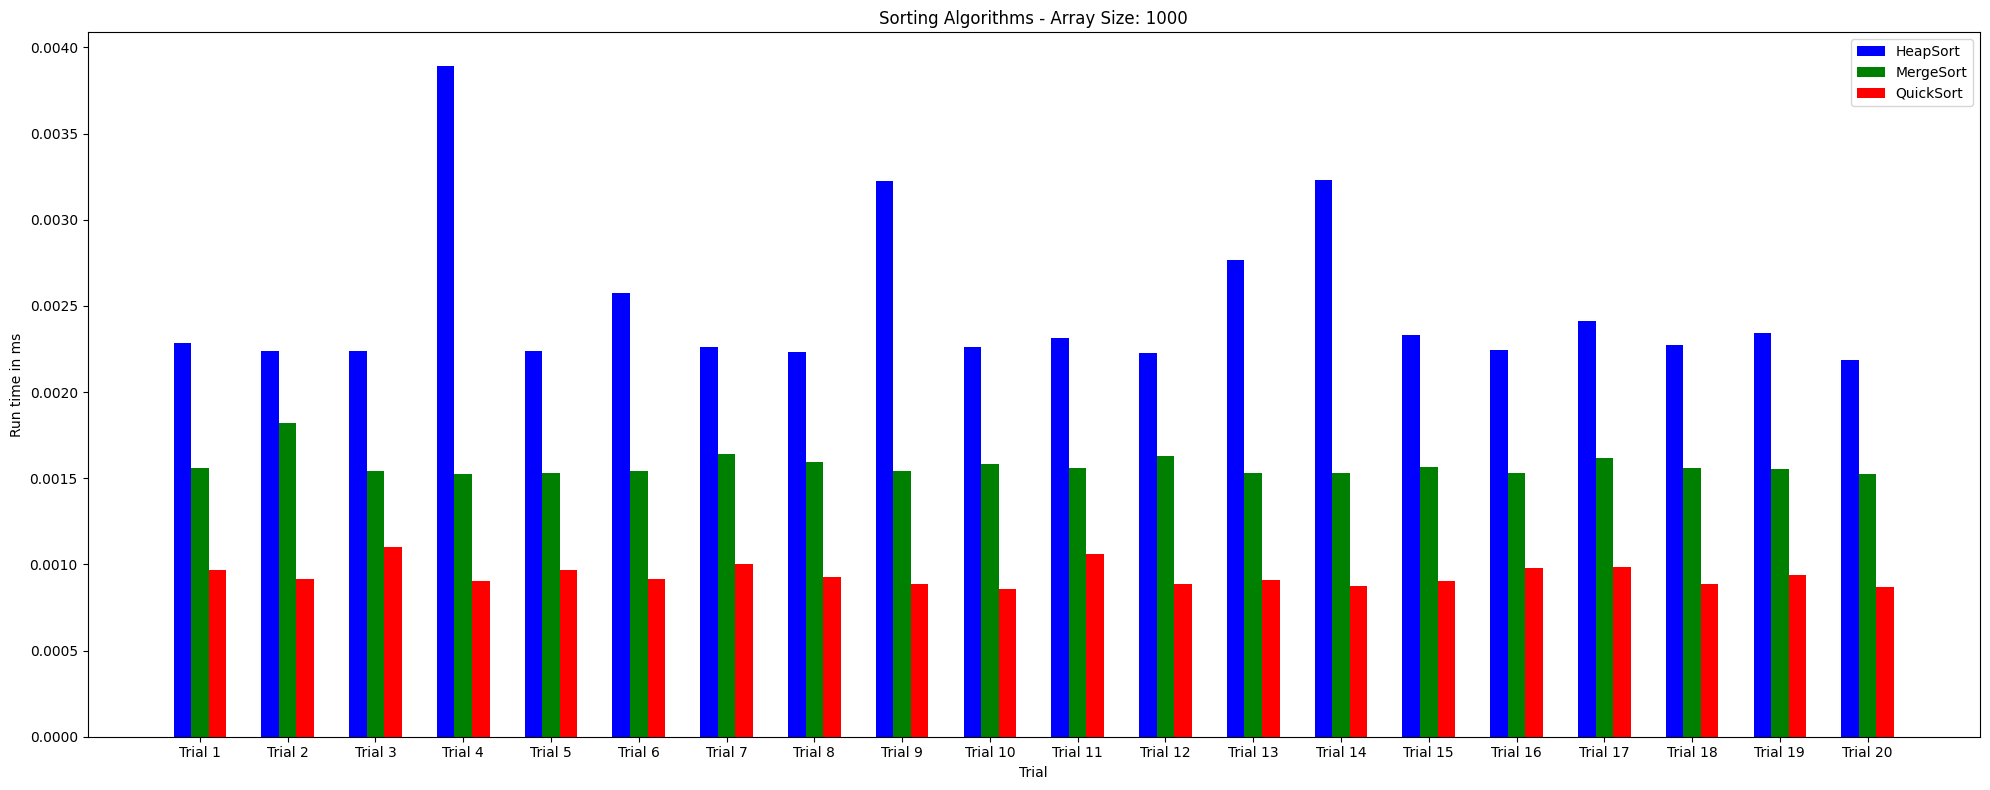

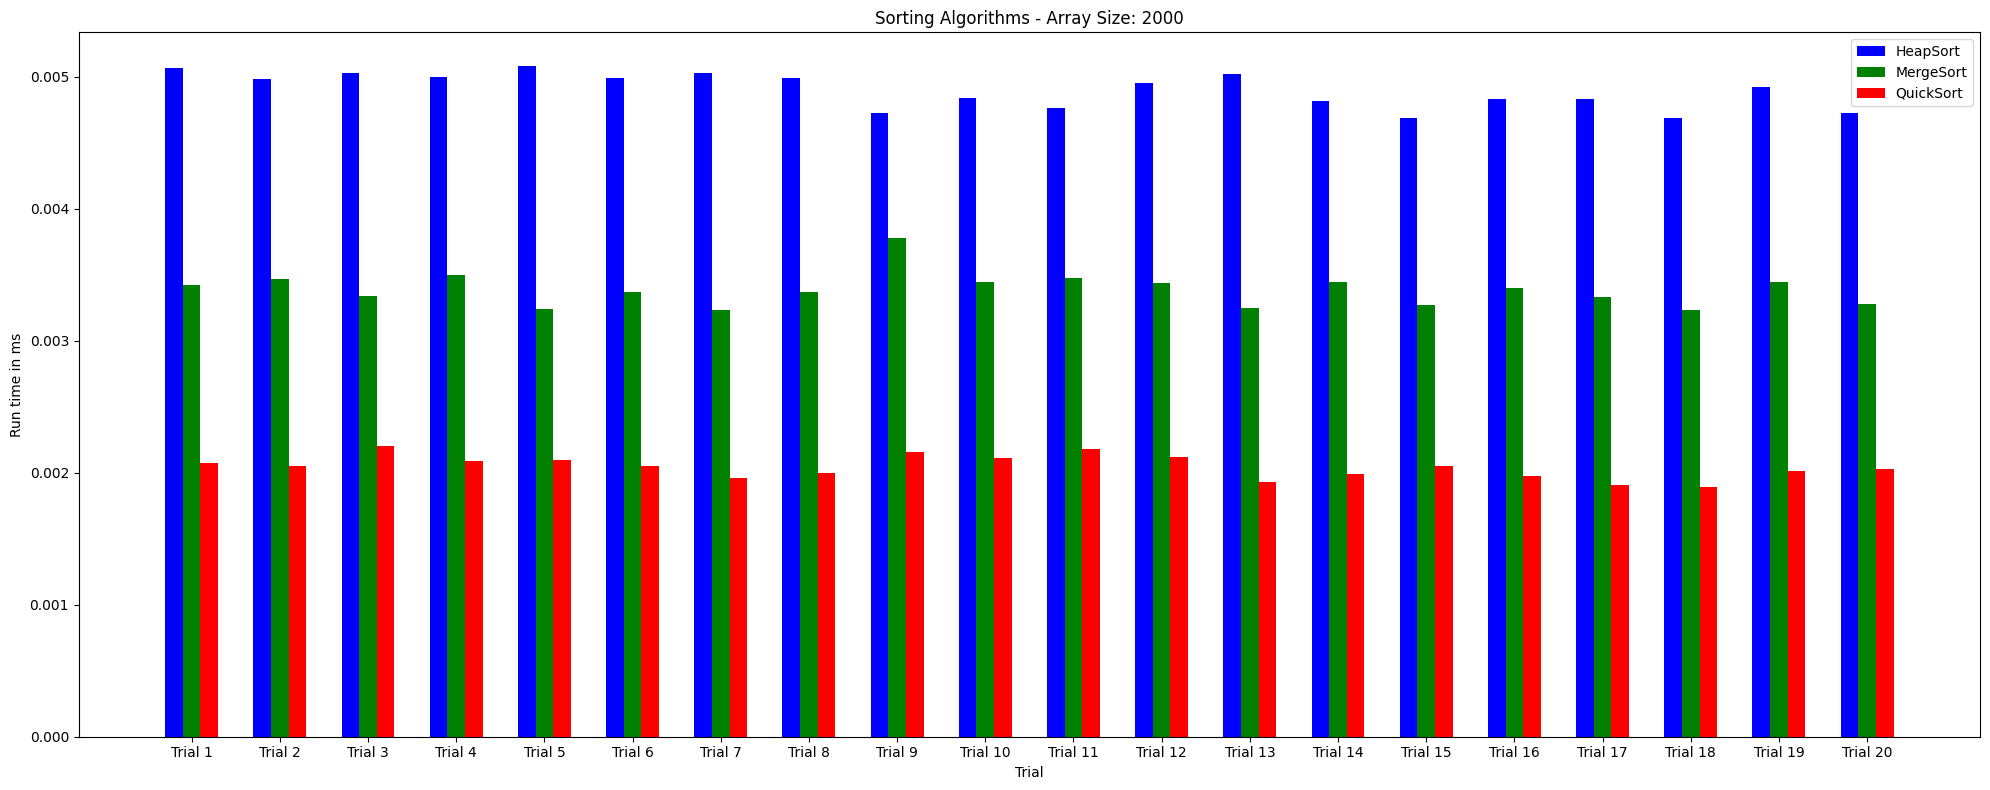

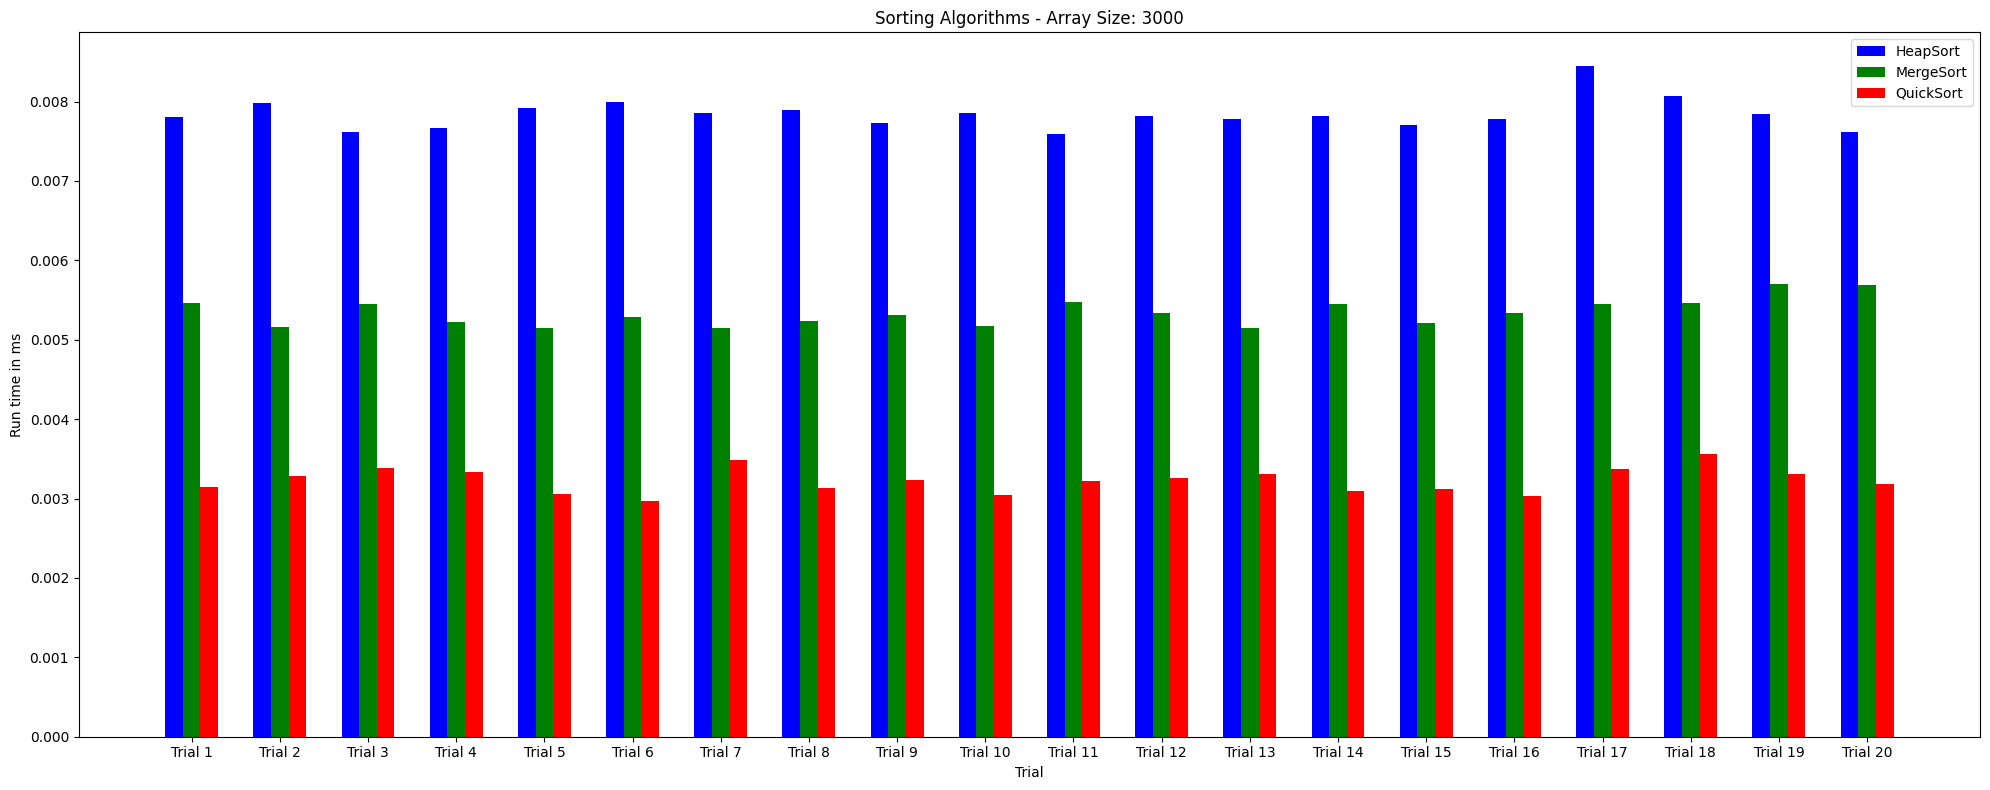

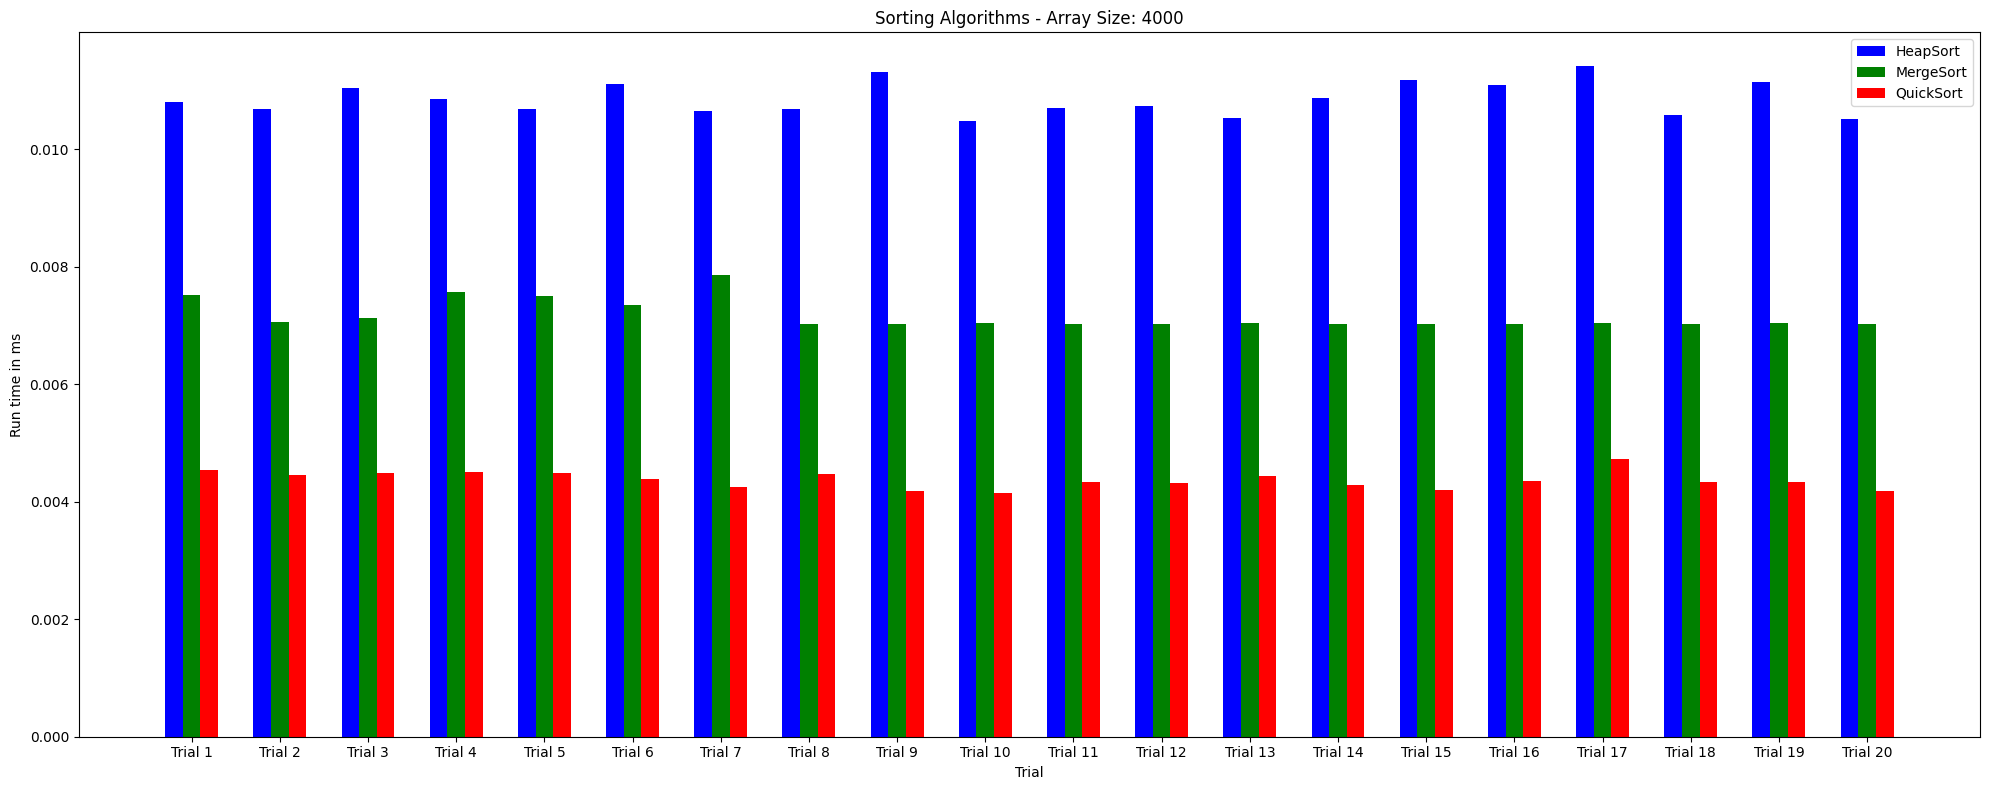

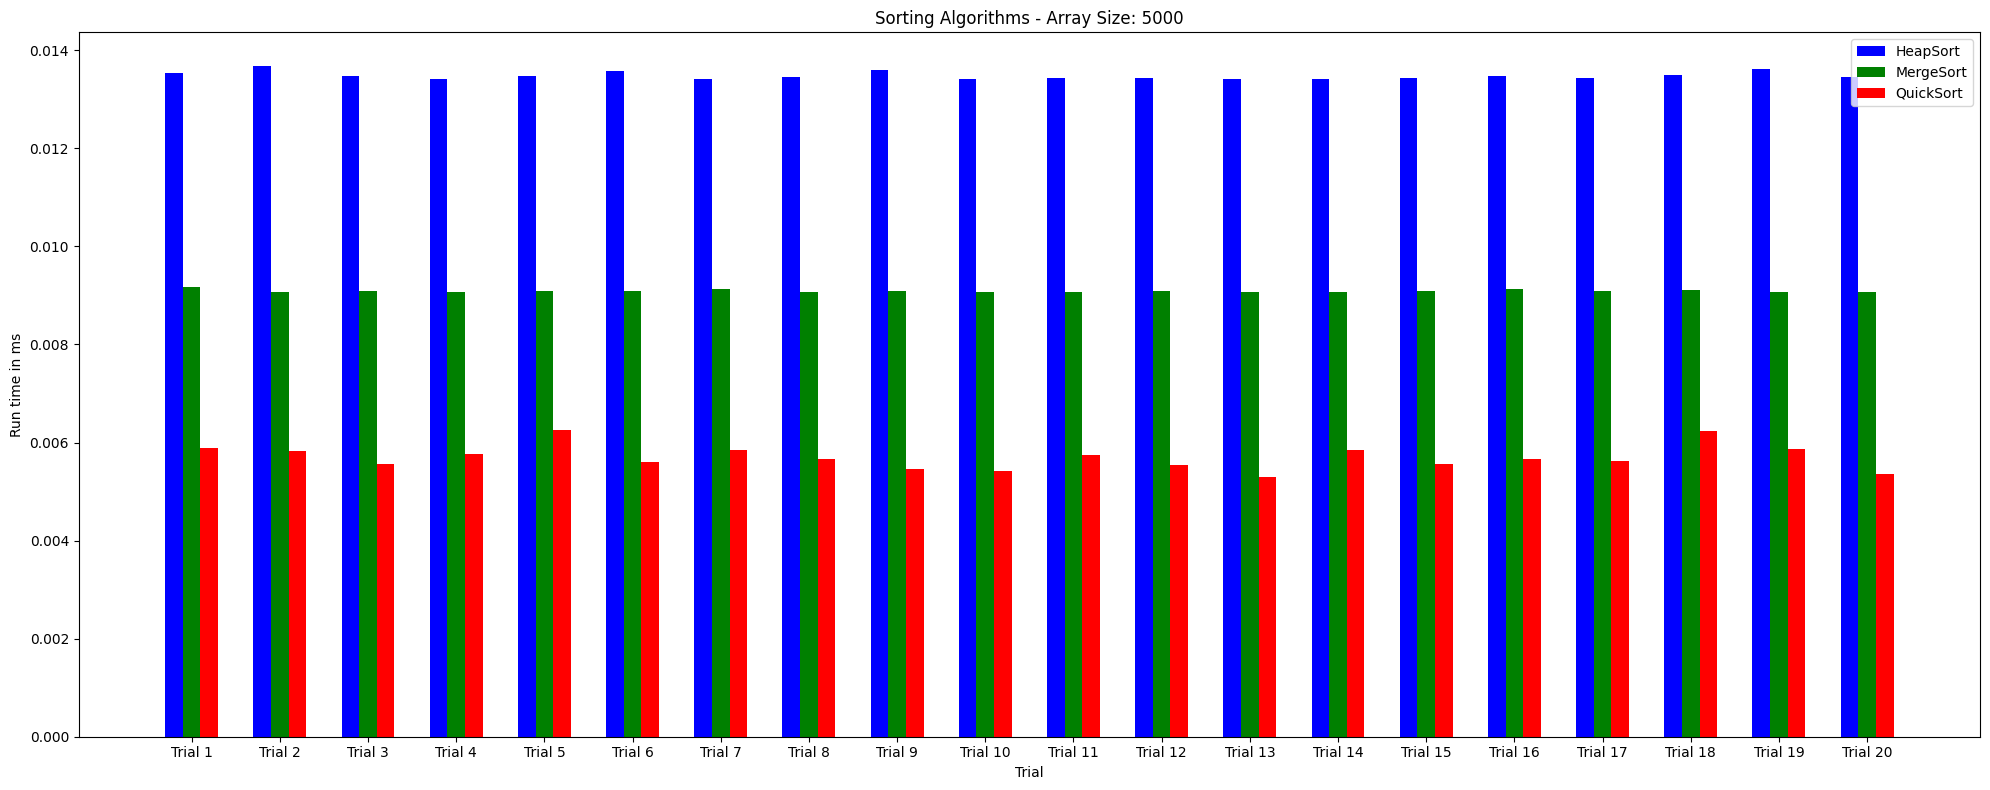

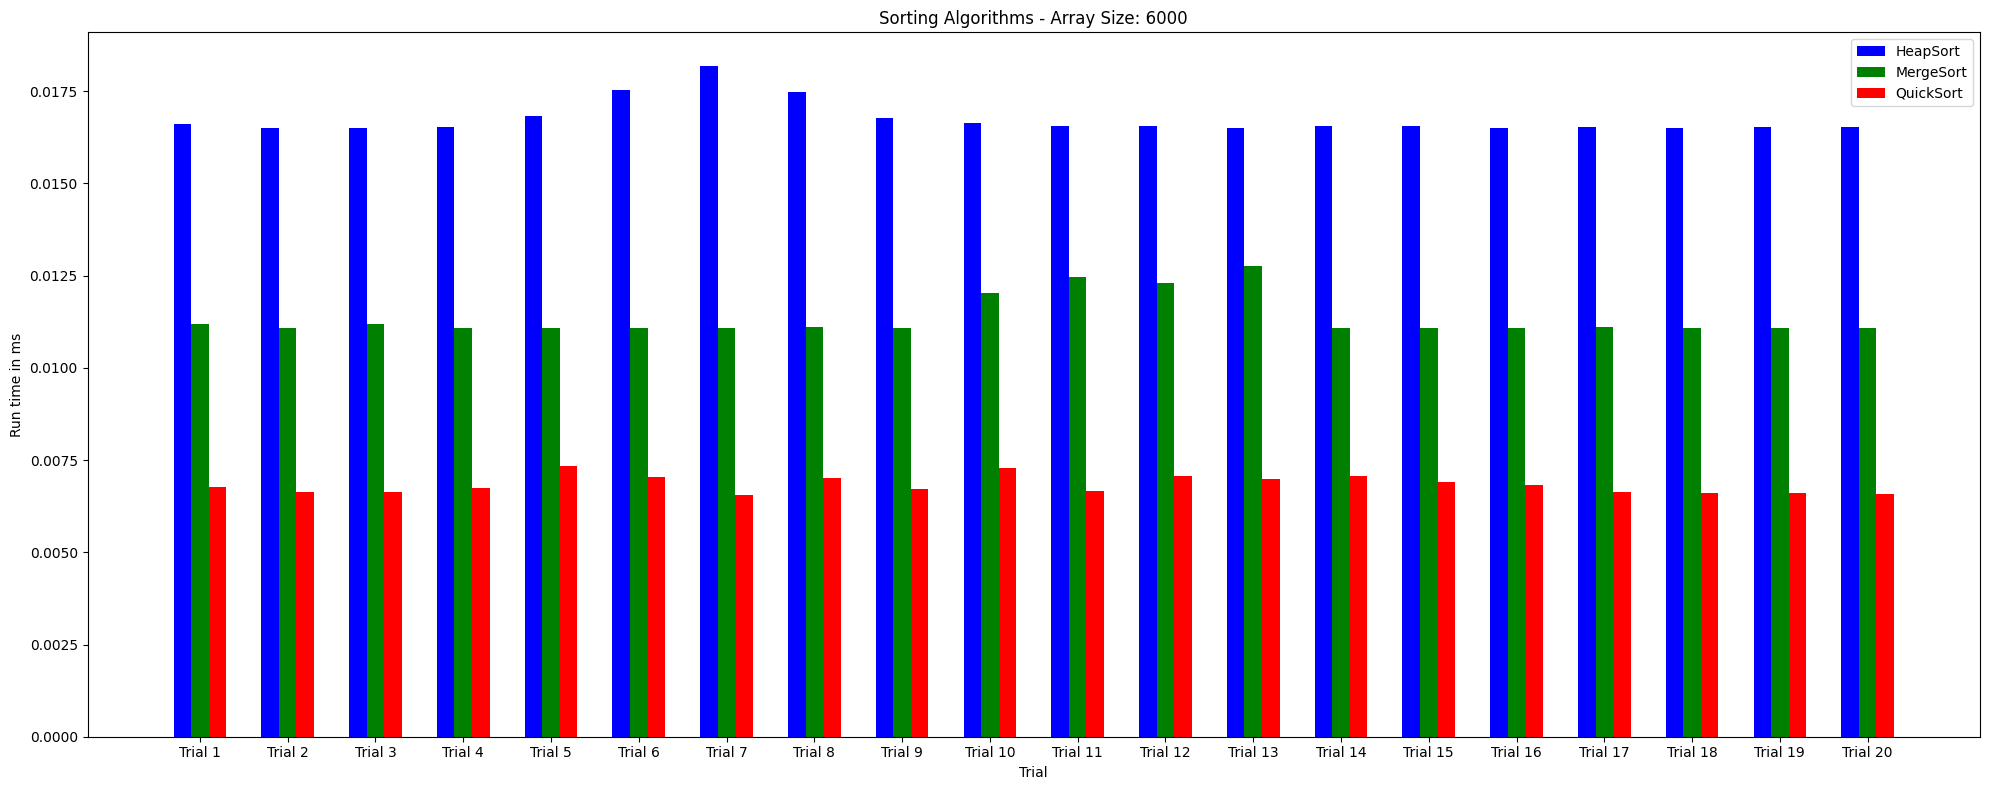

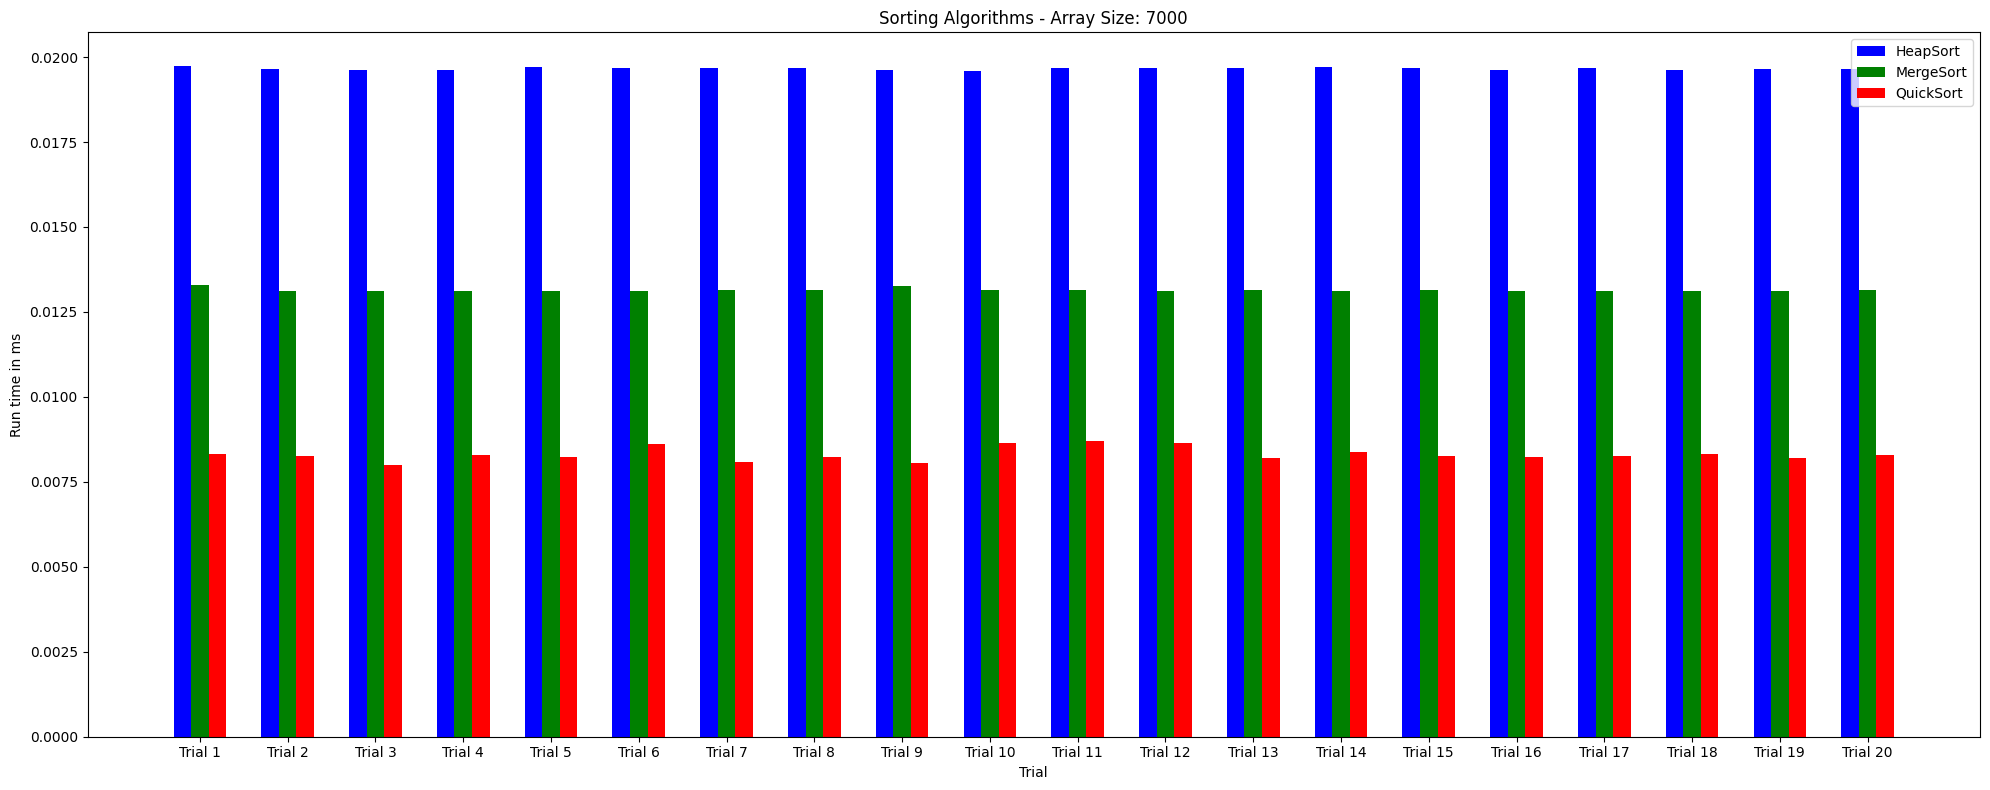

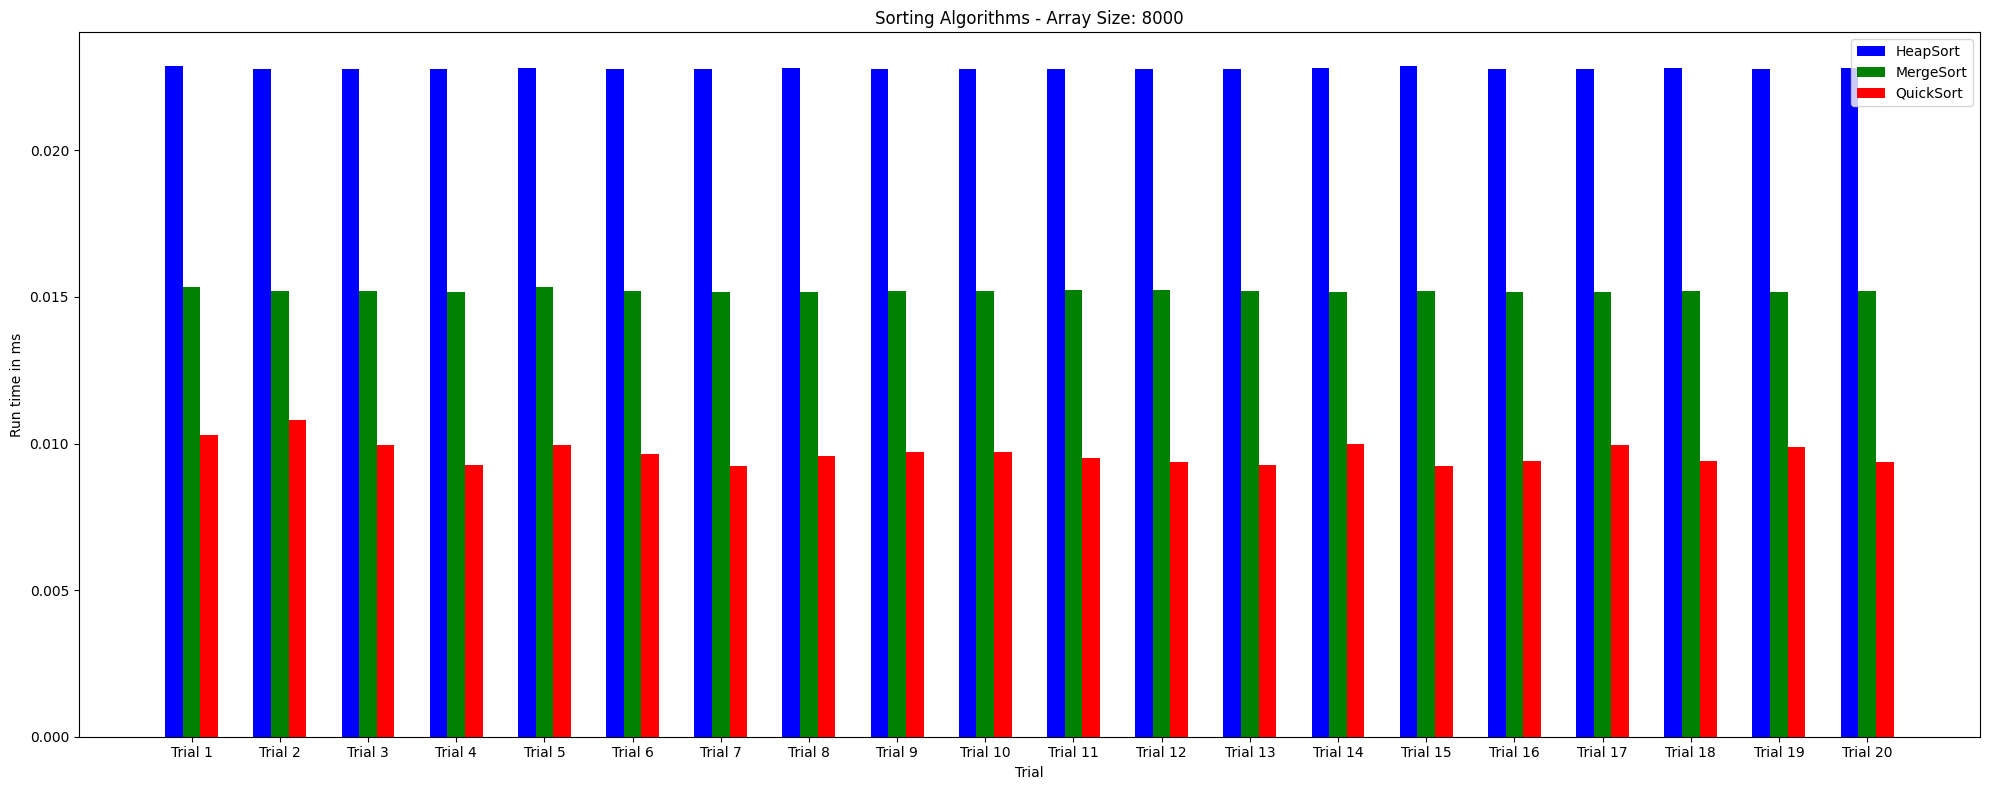

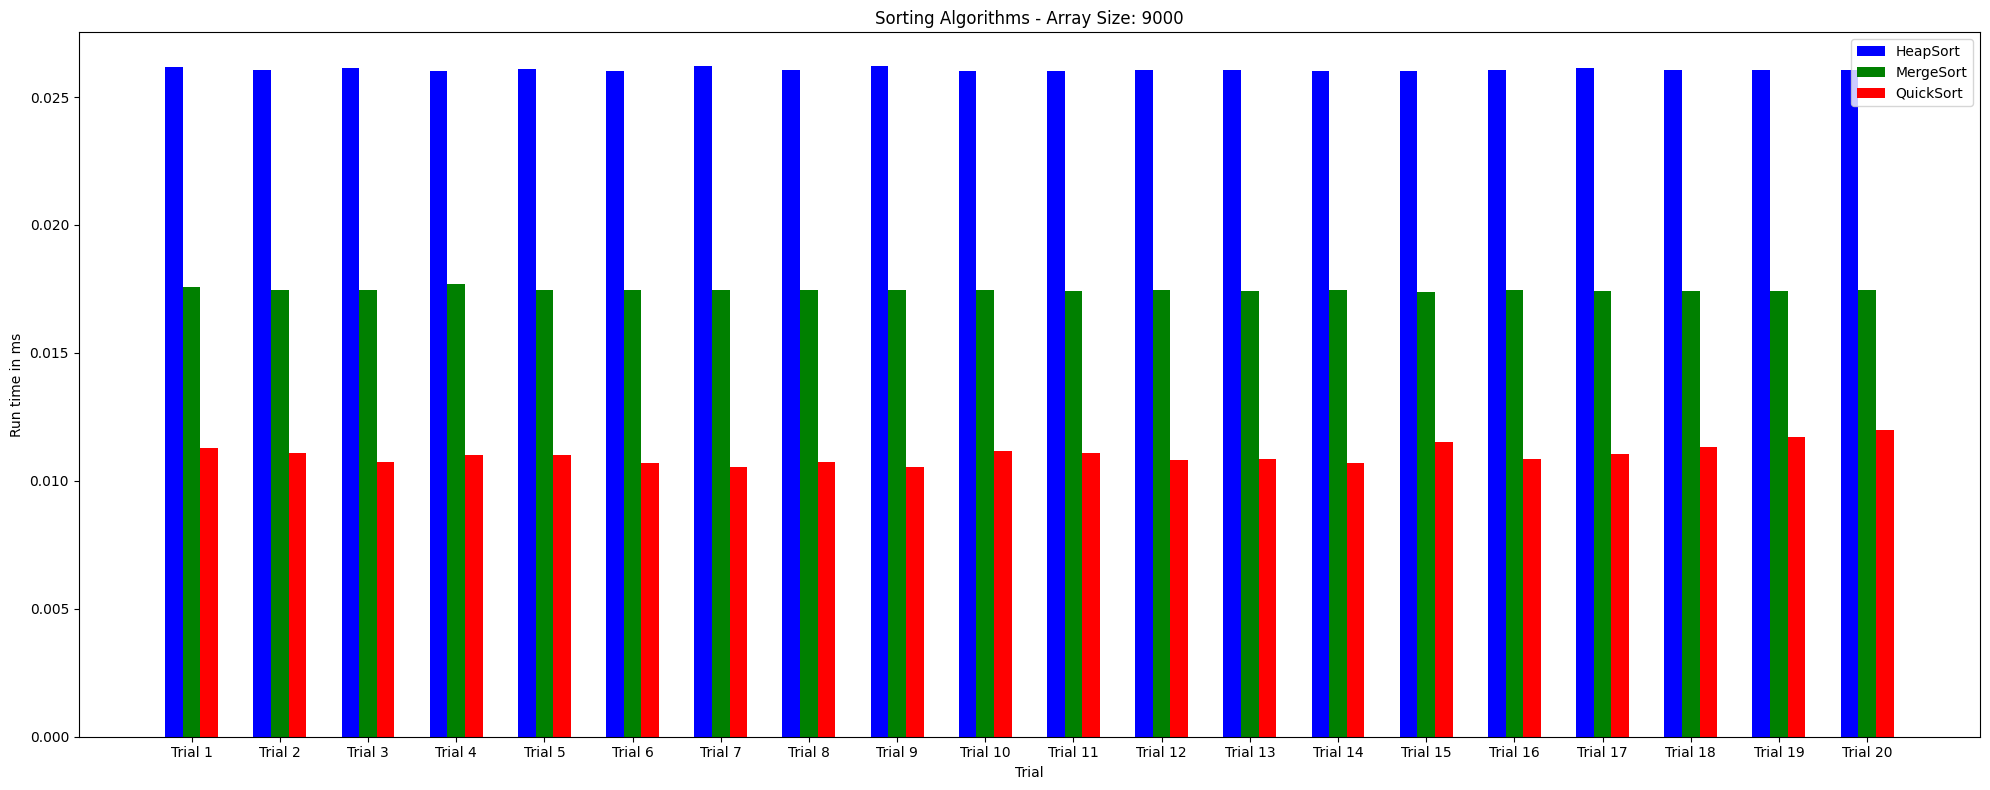

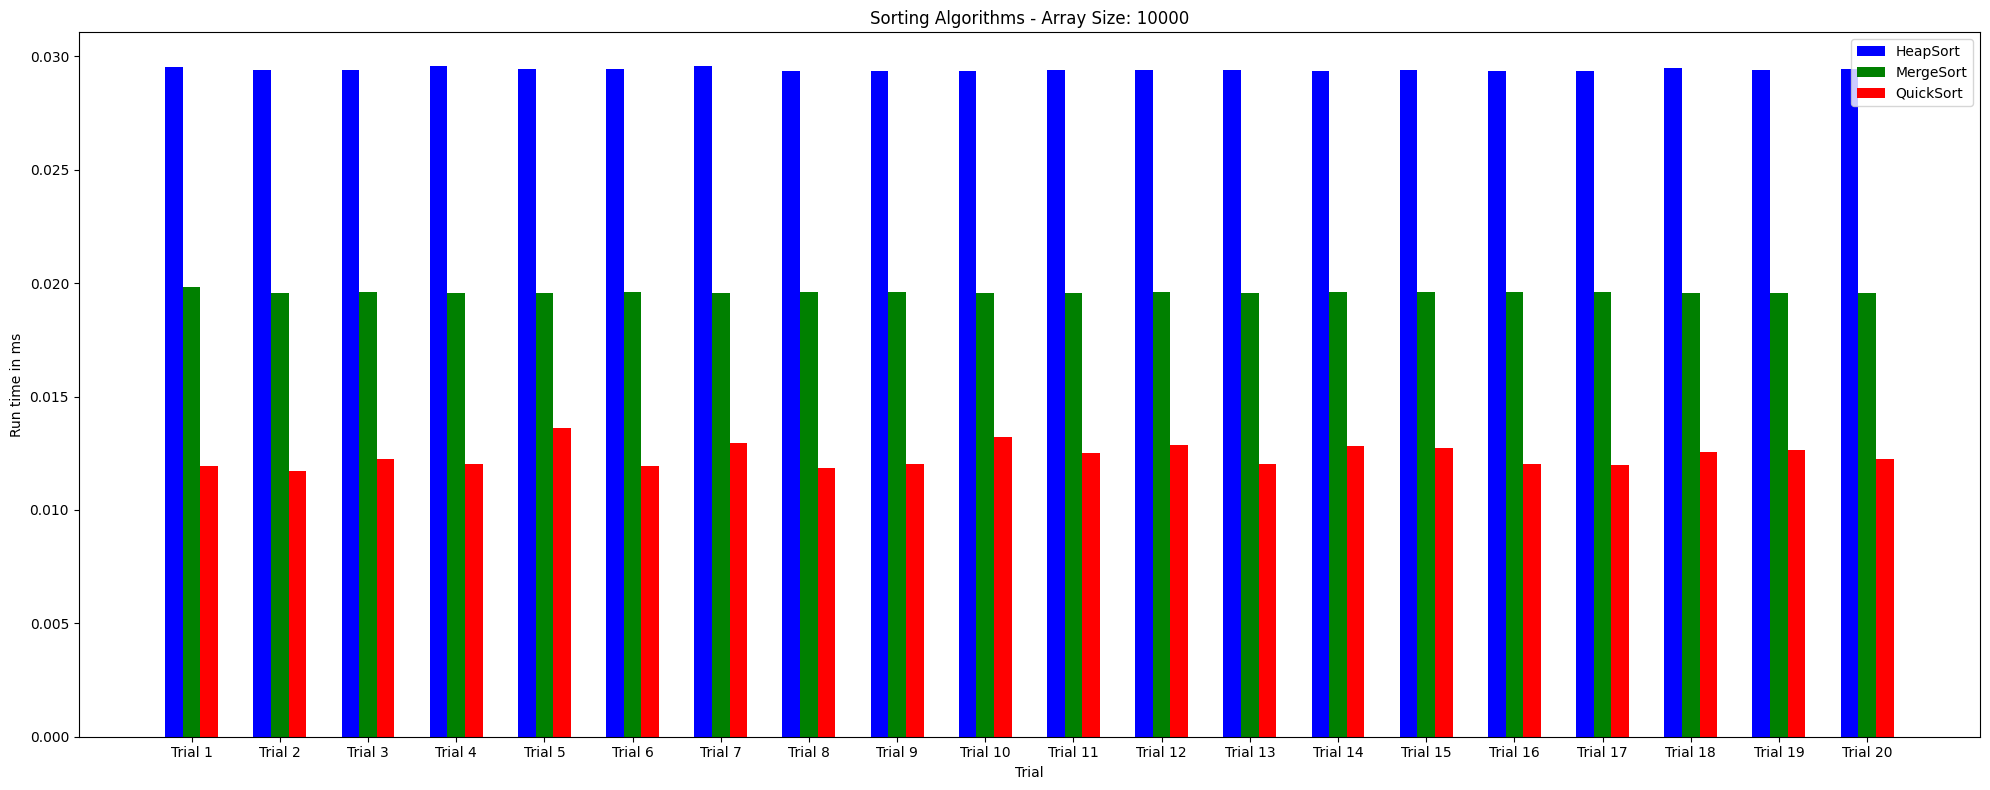

In [56]:
def draw_plot_1(results, title):
    n_groups = len(results['QuickSort'])
    fig, ax = plt.subplots(figsize=(20, 8))

    bar_width = 0.2
    index = np.arange(n_groups)

    plt.bar(index - bar_width, results['HeapSort'], bar_width, color='blue', label='HeapSort')
    plt.bar(index, results['MergeSort'], bar_width, color='green', label='MergeSort')
    plt.bar(index + bar_width, results['QuickSort'], bar_width, color='red', label='QuickSort')
    
    plt.xlabel('Trial')
    plt.ylabel('Run time in ms')
    plt.title(title)
    plt.xticks(index, [f'Trial {i+1}' for i in range(n_groups)])
    plt.legend()

    plt.tight_layout()
    plt.show()

def run_sorting_algorithm(sort_method, data):
    start_time = time.time()
    if sort_method == quickSort:
        sort_method(data, 0, len(data) - 1)
    else:
        sort_method(data)
    return time.time() - start_time

def experiment(sort_method, size, num_trials):
    trial_times = []
    for _ in range(num_trials):
        data = create_custom_list(size, 1000)
        trial_time = run_sorting_algorithm(sort_method, data.copy())
        trial_times.append(trial_time)
    return trial_times

array_sizes = [ 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
num_trials = 20
sorting_methods = {'HeapSort': heapSort, 'MergeSort': mergeSort, 'QuickSort': quickSort}
alg_results = {method: {size: [] for size in array_sizes} for method in sorting_methods}

for size in array_sizes:
    for method_name, sort_method in sorting_methods.items():
        alg_results[method_name][size] = experiment(sort_method, size, num_trials)

# Plot the results for each size
for size in array_sizes:
    results = {method: alg_results[method][size] for method in sorting_methods}
    draw_plot_1(results, f"Sorting Algorithms - Array Size: {size}")


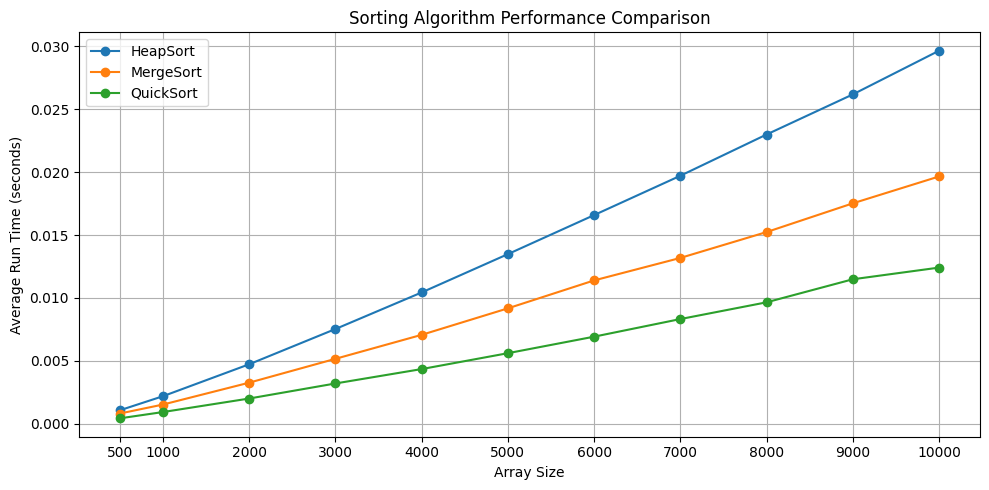

In [57]:

def calculate_average_times(results):
    average_times = {}
    for alg_name, times in results.items():
        average_times[alg_name] = [np.mean(time_list) for time_list in times.values()]
    return average_times

def draw_line_graph(average_times, array_sizes):
    plt.figure(figsize=(10, 5))
    for alg_name, times in average_times.items():
        plt.plot(array_sizes, times, marker='o', label=alg_name)
    plt.xlabel('Array Size')
    plt.ylabel('Average Run Time (seconds)')
    plt.title('Sorting Algorithm Performance Comparison')
    plt.xticks(array_sizes)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main execution
array_sizes = [500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
num_trials = 10
sorting_methods = {'HeapSort': heapSort, 'MergeSort': mergeSort, 'QuickSort': quickSort}
alg_results = {method: {} for method in sorting_methods}

# Running the experiment
for size in array_sizes:
    for method_name, sort_method in sorting_methods.items():
        run_times = []
        for _ in range(num_trials):
            data = create_custom_list(size, 1000)
            time_taken = run_sorting_algorithm(sort_method, data.copy())
            run_times.append(time_taken)
        alg_results[method_name][size] = run_times

# Calculate average run times
average_times = calculate_average_times(alg_results)

# Draw the line graph
draw_line_graph(average_times, array_sizes)

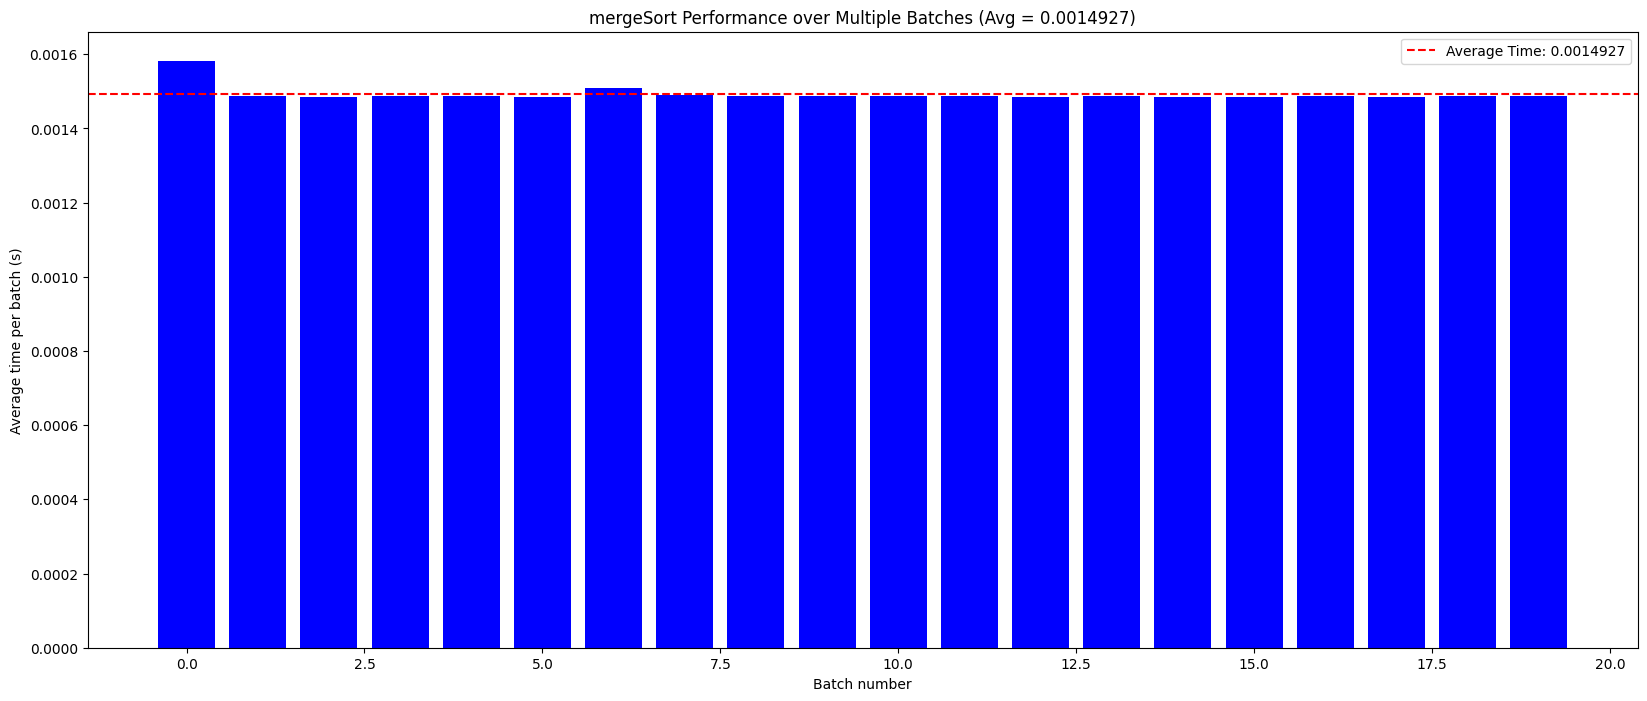

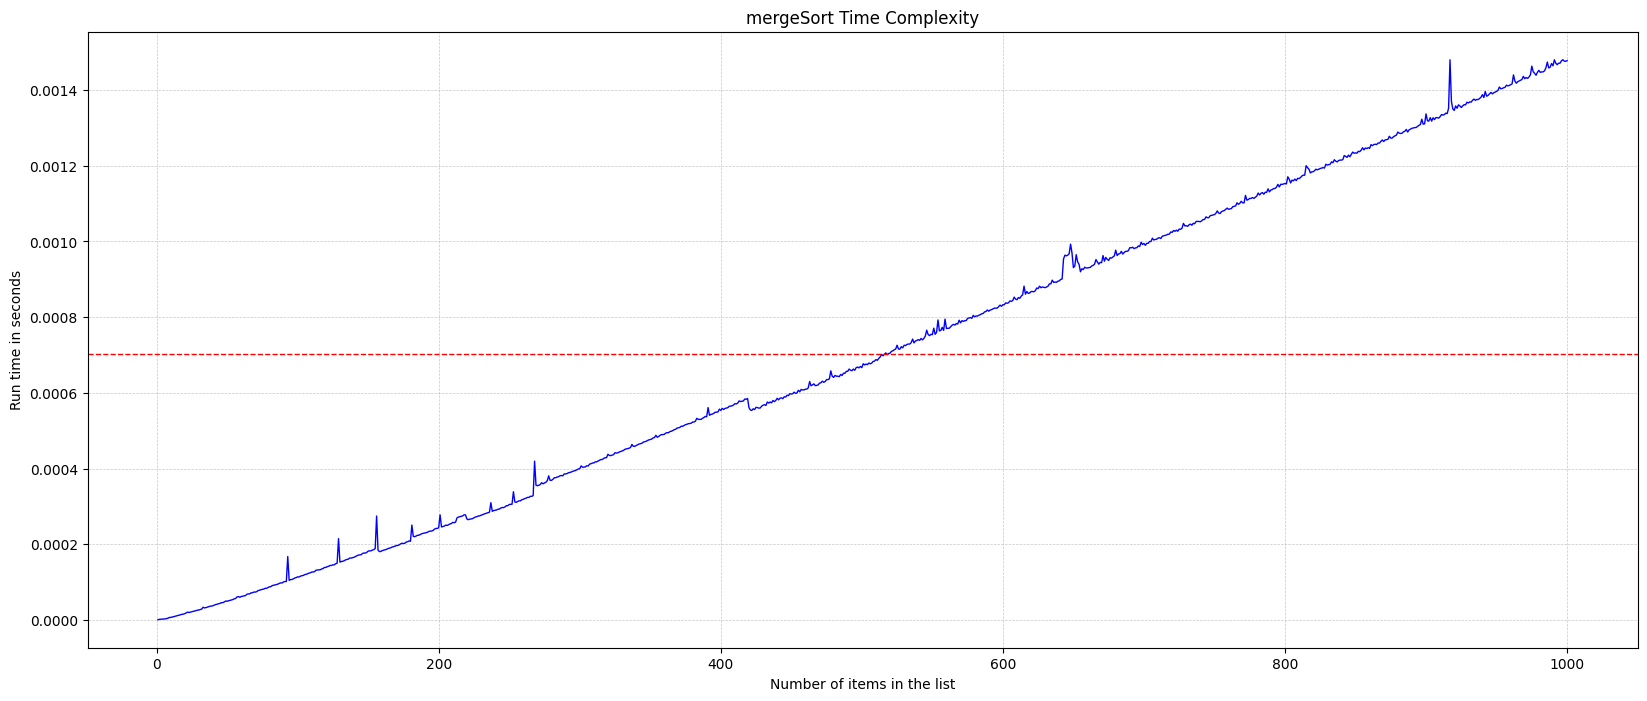

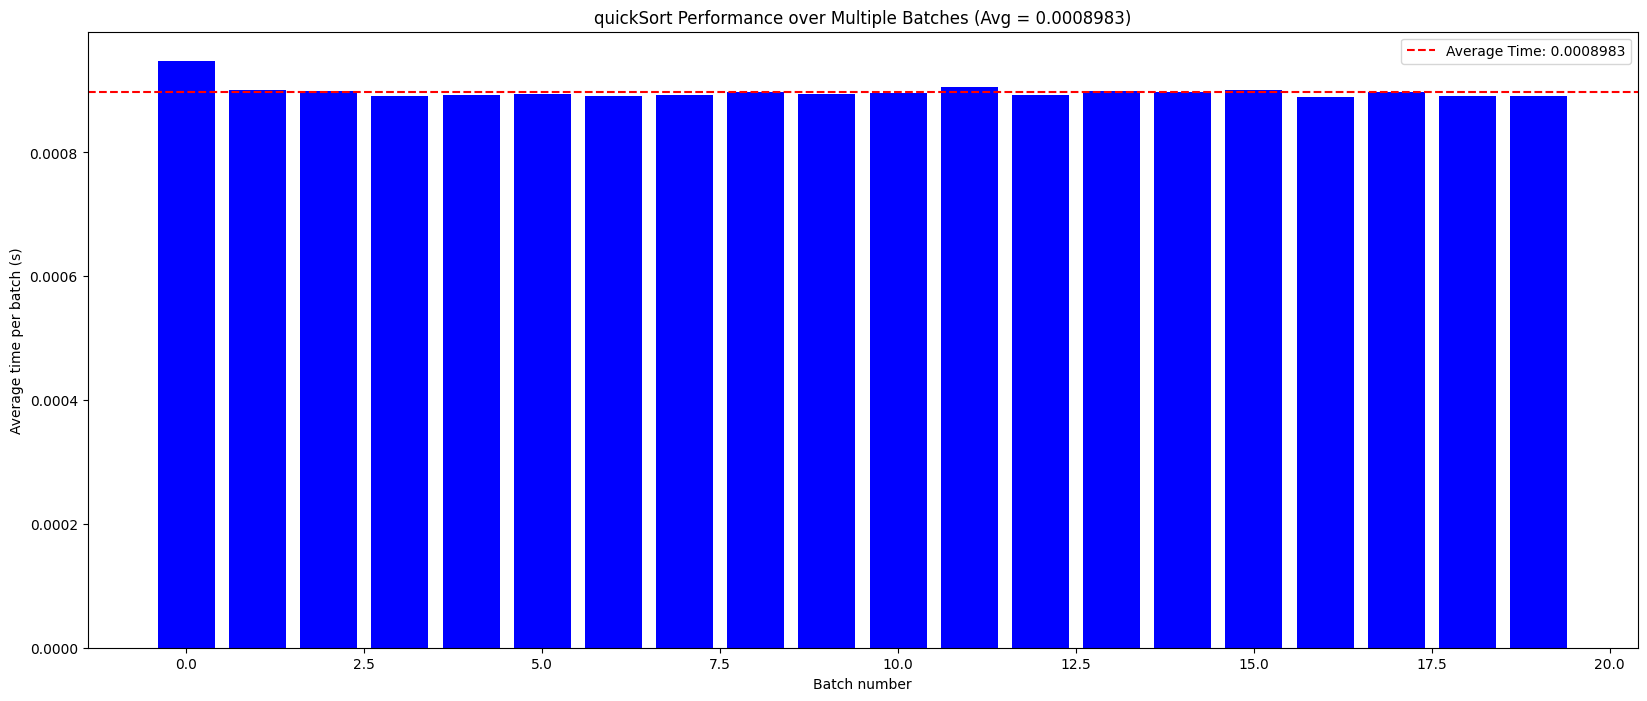

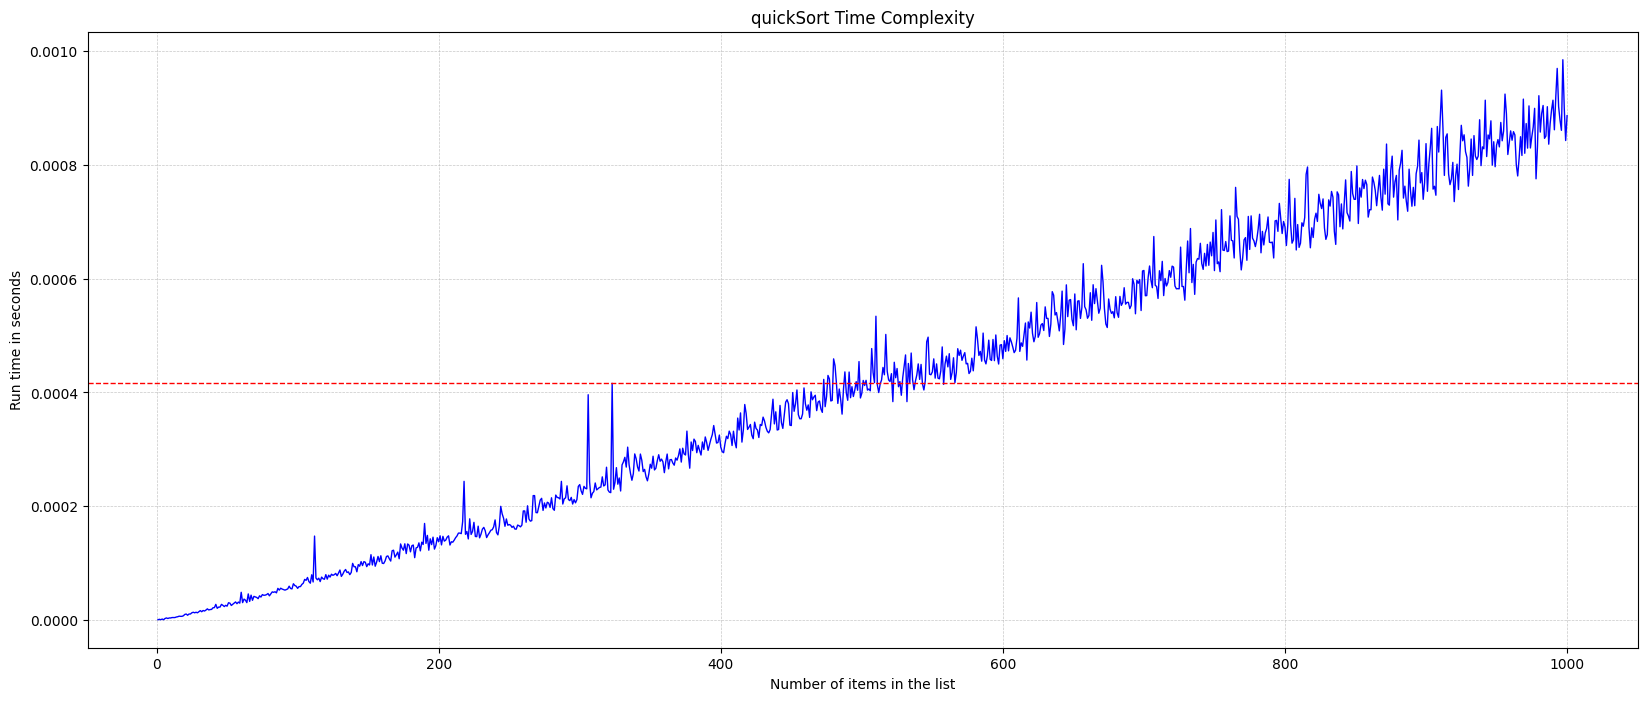

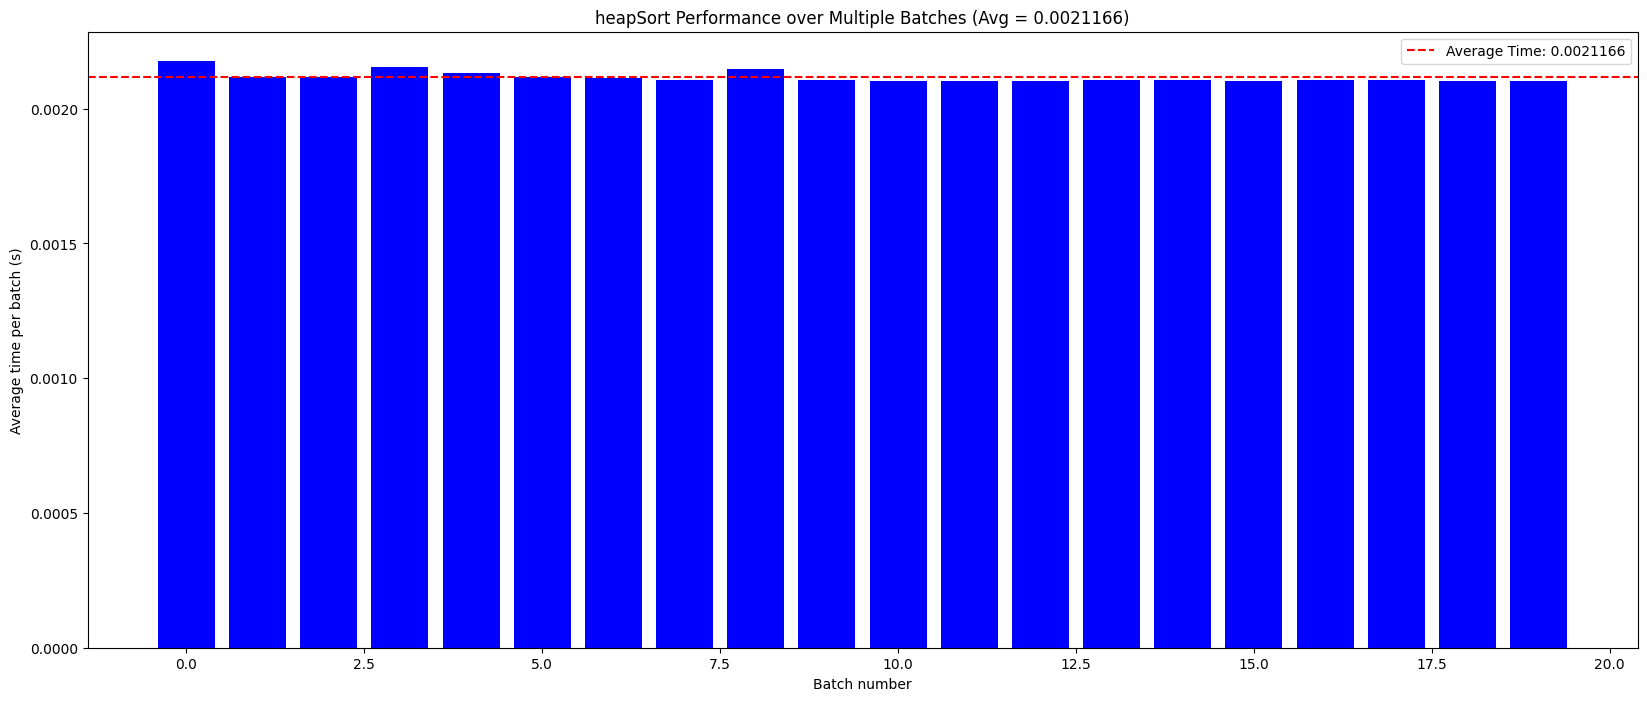

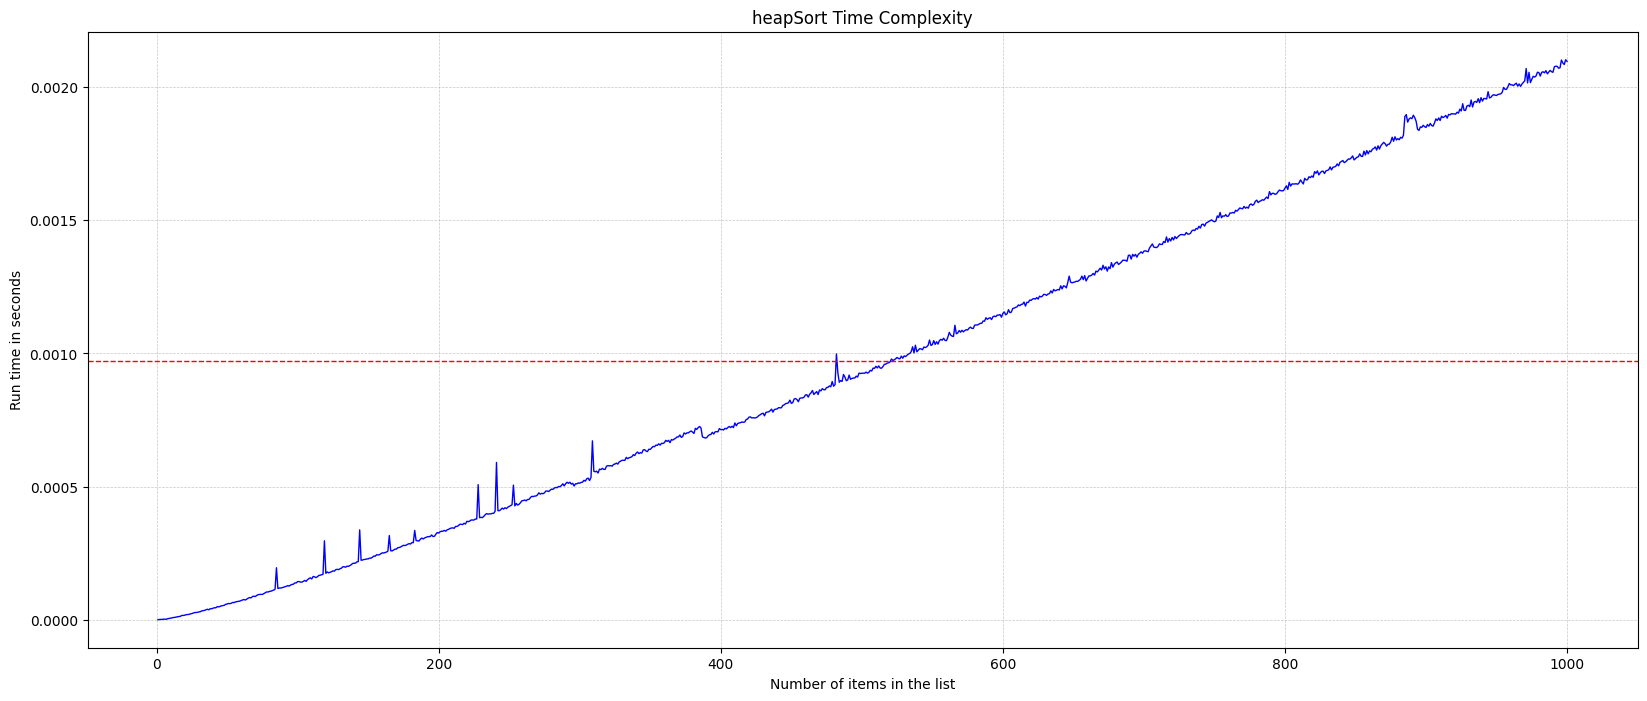

In [58]:
#I created a new draw_plot inorder to show sorting algorithms in different plots
def draw_plot_2(timings, algorithm_name):
    avg_time = np.mean(timings)
    plt.figure(figsize=(20, 8))
    plt.bar(range(len(timings)), timings, color='blue')
    plt.axhline(y=avg_time, color='red', linestyle='dashed', label=f'Average Time: {avg_time:.7f}')
    plt.xlabel('Batch number')
    plt.ylabel('Average time per batch (s)')
    plt.title(f'{algorithm_name} Performance over Multiple Batches (Avg = {avg_time:.7f})')
    plt.legend()
    plt.show()

def draw_line_chart(x, y, title, avg_time):
    plt.figure(figsize=(20, 8))
    
   
    plt.plot(x, y, color='blue', linewidth=1.0) 

    plt.axhline(y=avg_time, color='red', linestyle='dashed', linewidth=1.0, label=f'Average Time: {avg_time:.7f}')
    
    plt.xlabel('Number of items in the list')
    plt.ylabel('Run time in seconds')  
    plt.title(title)
    
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    
    plt.show()

def sort_experiment(sort_method, N, list_length, max_value):
    timings = []

    batches = N // 500
    for _ in range(batches):
        batch_timings = []
        for _ in range(100):
            custom_list = create_custom_list(list_length, max_value)
            start_time = time.time()
            if sort_method.__name__ == 'quickSort':
                sort_method(custom_list, 0, len(custom_list) - 1)
            else:
                sort_method(custom_list)
            end_time = time.time()
            execution_time = end_time - start_time
            batch_timings.append(execution_time)
        
        average_time = np.mean(batch_timings)
        timings.append(average_time)
    
    draw_plot_2(timings, sort_method.__name__)

def size_experiment(sort_method, max_list_size, max_value):
    list_sizes = list(range(1, max_list_size + 1))
    timings = []
    for size in list_sizes:
        custom_list = create_custom_list(size, max_value)
        start_time = time.time()
        if sort_method.__name__ == 'quickSort':
            sort_method(custom_list, 0, len(custom_list) - 1)
        else:
            sort_method(custom_list)
        end_time = time.time()
        execution_time = end_time - start_time
        timings.append(execution_time)
    
    avg_time = np.mean(timings)
    draw_line_chart(list_sizes, timings, f'{sort_method.__name__} Time Complexity', avg_time)

# Main execution
N = 10000
list_length = 1000
max_value = 1000

# Run experiments for each sorting method
for sort_method in [mergeSort, quickSort, heapSort]:
    sort_experiment(sort_method, N, list_length, max_value)
    size_experiment(sort_method, 1000, max_value)

In this section, provide a detailed outline of:
- The experiments you ran, length values of the list you chose, number of runs, etc.
- The plots showing the run times corresponding to each algorithm.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.

---
---

### PART E

E1. In previous experiments you also saw that not all algorithms are suitable for all scenarios. For instance, Merge Sort is better than Quick sort for certain situations. In this section, design a experiment to compare the scenarios where Merge Sort is better/worse than Quick Sort. You can use the traditional version of Merge Sort or use improved version ( maybe via recursion) to compare this performance.

# Detailed Outline of Sorting Algorithm Experiments

## Experiment Overview

We conducted a detailed analysis of two sorting algorithms: Merge Sort and Quick Sort, under varying conditions of the input array. The goal was to assess the efficiency and adaptability of these algorithms in different scenarios that are commonly encountered in practical applications.

### Experiment 1: Diverse Scenario Analysis

#### Setup
- **Algorithms**: Merge Sort, Quick Sort
- **Array Size**: Each array consisted of 1000 elements.
- **Scenarios Tested**: 
  - All Same Elements: To test algorithm performance on homogenous data.
  - Ascending Order: To evaluate performance on pre-sorted data.
  - Descending Order: To assess how each algorithm handles inversely sorted data.
  - Nearly Sorted: To observe the algorithms' behavior on mostly sorted data with minimal disorder.
- **Number of Runs**: Each scenario was run 10 times to ensure the reliability of the results.

#### Data Generation
- Arrays were generated for each of the specified scenarios, thereby creating a diverse set of conditions for each sorting algorithm to process.

#### Execution
- In each trial, both Merge Sort and Quick Sort were executed on the generated arrays, and their runtimes were accurately recorded.

### Results Visualization
- The results were plotted using bar graphs for each scenario, showing a side-by-side comparison of the runtimes for Merge Sort and Quick Sort.
- These plots provide a clear visual representation of how each algorithm performed under each specific scenario.

### Discussion and Conclusion
- **Observations**:
  - Merge Sort demonstrated consistent performance across all scenarios, showcasing its reliability regardless of input conditions.
  - Quick Sort showed variable performance, excelling in some scenarios while lagging in others, particularly in arrays with descending order.
- **Conclusion**:
  - The choice between Merge Sort and Quick Sort should be informed by the nature of the dataset. 
  - For datasets with unknown characteristics or those that could be inversely sorted, Merge Sort may be the safer choice due to its consistent performance.
  - In cases where the data is known to be random or nearly sorted, Quick Sort could provide better efficiency.
- These insights highlight the importance of understanding data characteristics in algorithm selection for optimal performance.


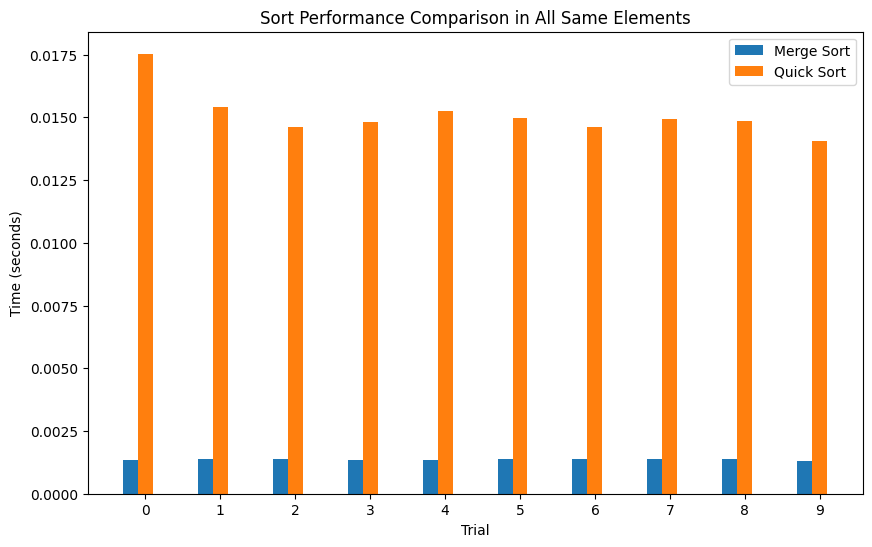

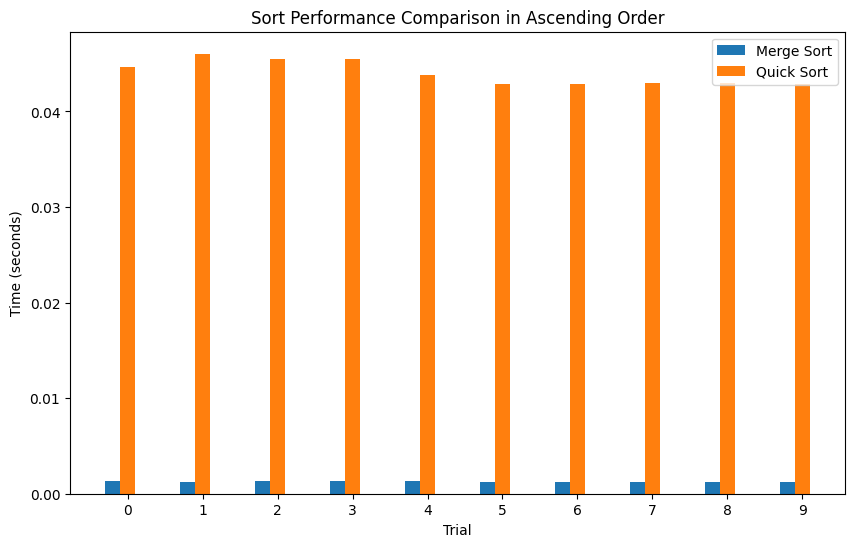

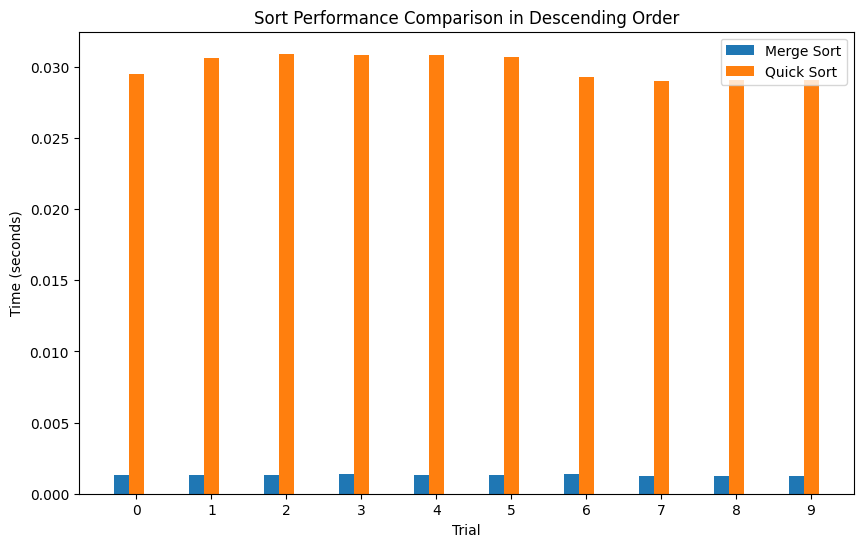

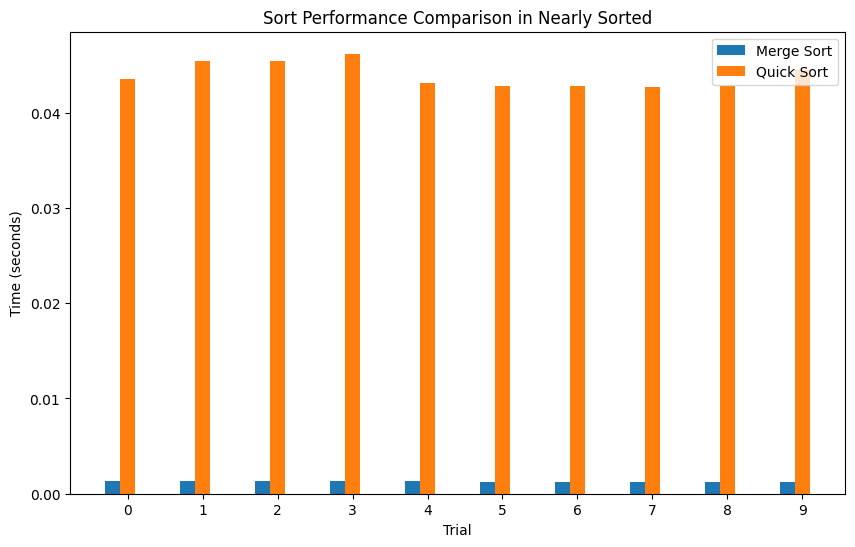

In [59]:


def create_scenario_array(size, scenario):
    if scenario == 'All Same Elements':
        return [1] * size
    elif scenario == 'Ascending Order':
        return list(range(size))  # Workaround for list(range(size))
    elif scenario == 'Descending Order':
        return [i for i in range(size, 0, -1)]  # Workaround for list(range(size, 0, -1))
    elif scenario == 'Nearly Sorted':
        arr = [i for i in range(size)]  # Workaround
        arr[-1], arr[-2] = arr[-2], arr[-1]  # Swap last two elements
        return arr
    else:
        raise ValueError(f"Unknown scenario: {scenario}")


def run_experiment(array_size, num_trials, scenario):
    merge_sort_times = []
    quick_sort_times = []
    for _ in range(num_trials):
        data = create_scenario_array(array_size, scenario)
        merge_sort_times.append(run_sorting_algorithm(mergeSort, data.copy()))
        quick_sort_times.append(run_sorting_algorithm(quickSort, data.copy()))
    
    return merge_sort_times, quick_sort_times

def plot_results(merge_sort_times, quick_sort_times, scenario):
    x = np.arange(len(merge_sort_times))

    plt.figure(figsize=(10, 6))
    plt.bar(x - 0.2, merge_sort_times, width=0.2, label='Merge Sort')
    plt.bar(x, quick_sort_times, width=0.2, label='Quick Sort')
    plt.xlabel('Trial')
    plt.ylabel('Time (seconds)')
    plt.title(f'Sort Performance Comparison in {scenario}')
    plt.xticks(x)
    plt.legend()
    plt.show()

# Main execution
array_size = 1000
num_trials = 10
scenarios = ['All Same Elements', 'Ascending Order', 'Descending Order', 'Nearly Sorted']

for scenario in scenarios:
    merge_sort_times, quick_sort_times = run_experiment(array_size, num_trials, scenario)
    plot_results(merge_sort_times, quick_sort_times, scenario)

In this section, provide a detailed outline of:
- The experiments you ran, length values of the list you chose, number of runs, etc.
- The plots showing the run times corresponding to each algorithm.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.

---

E2. Recall that on the first day of class I asked which two algorithms have similar complexity - Merge Sort and Quick Sort under (O(nlogn)) are likely to perform similar under average cases. However, under worst case, the complexity of quick sort is much worse (O(n^2). Design an experiment to show this behavior. Plot this behavior on a bar/line chart. 

Next, count the number of "swaps" after which Quick sort starts behaving comparable to Merge sort. 

HINT: This will be a threshold at which the quick sort algorithm picks up again.


# Detailed Outline of Sorting Algorithm Experiments

## Experiment Overview

The experiments were designed to evaluate the performance of Merge Sort and Quick Sort under different scenarios, focusing on their runtime efficiency and swap counts in Quick Sort. The main goal was to identify scenarios where Quick Sort's performance matches or exceeds that of Merge Sort.

### Experiment 1: Comparative Analysis in Varied Scenarios

#### Setup
- **Algorithms**: Merge Sort, Quick Sort
- **Array Size**: Each array consisted of 200 elements.
- **Scenarios**: 
  - **Best Case**: An array already sorted in ascending order.
  - **Average Case**: An array with randomly shuffled integers.
  - **Worst Case**: An array sorted in descending order, which typically challenges Quick Sort.
- **Trials**: Conducted 10 trials for each scenario to ensure data consistency.

#### Rationale Behind Worst Case Scenario
- The descending order represents the traditional worst-case scenario for Quick Sort, as it tends to increase the number of swaps required, directly impacting its runtime efficiency.

### Results Visualization
- **Runtime Comparison**: Plotted using line graphs, comparing the runtime of Merge Sort and Quick Sort across various trials in each scenario.
- **Swap Count Analysis**: Quick Sort's swap counts were plotted to understand its efficiency in terms of operations required to sort the array.

### Swap Count Computation and Verification
- **Computation Method**: For Quick Sort, swap counts were tallied during the sorting process. Each time two elements were swapped, the counter was incremented.
- **Validation**:
  - To verify the swap count calculation, we applied Quick Sort to a different list under the same experimental conditions.
  - Example: A small array with a known number of required swaps was used to confirm that the swap count mechanism accurately reflects the number of operations performed.

### Conclusions from the Experiments
- **Best Case**: No trial where Quick Sort's performance met the set threshold ratio compared to Merge Sort.
- **Average Case**: Quick Sort performed comparably to Merge Sort in the first trial with 727 swaps, indicating its efficiency in randomly ordered data.
- **Worst Case**: Quick Sort did not meet the threshold ratio in performance, reaffirming the known inefficiency in descending order scenarios.

### Implications
- These results highlight the importance of understanding data characteristics when choosing a sorting algorithm. Quick Sort shows high efficiency in average cases but can be suboptimal in certain scenarios like the worst-case descending order.


In [28]:
#This quick sort implementation has number of swaps as a parameter

def quickSort(array, low, high, count_swaps):
    if low < high:
        pivot, swaps = partition(array, low, high)
        count_swaps[0] += swaps
        quickSort(array, low, pivot - 1, count_swaps)
        quickSort(array, pivot + 1, high, count_swaps)
    return count_swaps[0]  

def partition(array, low, high):
    pivot = array[high]
    i = low - 1
    swaps = 0

    for j in range(low, high):
        if array[j] < pivot:
            i += 1
            array[i], array[j] = array[j], array[i]
            swaps += 1

    array[i + 1], array[high] = array[high], array[i + 1]
    swaps += 1
    return i + 1, swaps



No comparison point found where Quick Sort performs within the threshold ratio for the Best case.
In the Average case, Quick Sort performs comparably to Merge Sort at trial 1 with 727 swaps.
No comparison point found where Quick Sort performs within the threshold ratio for the Worst case.


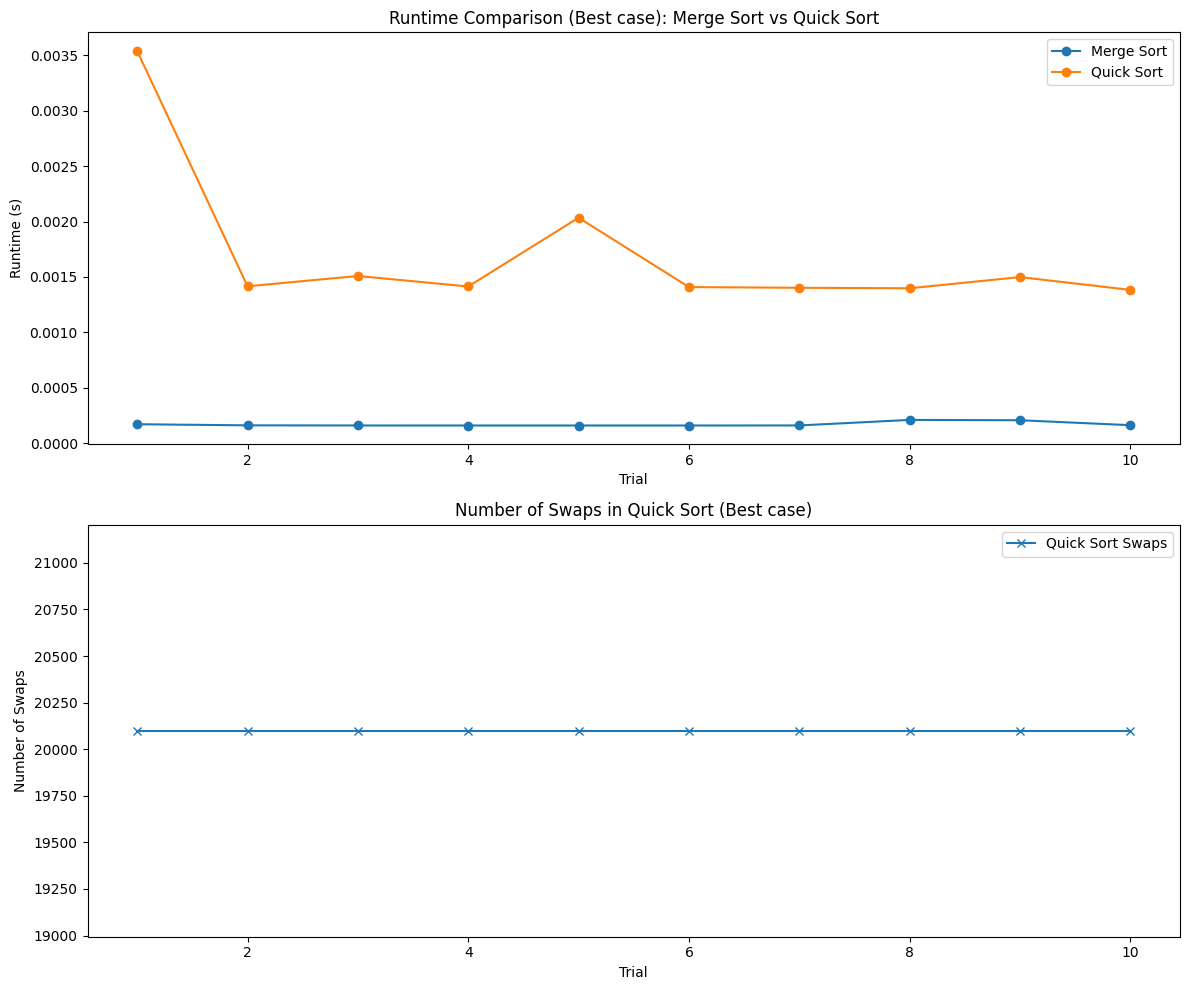

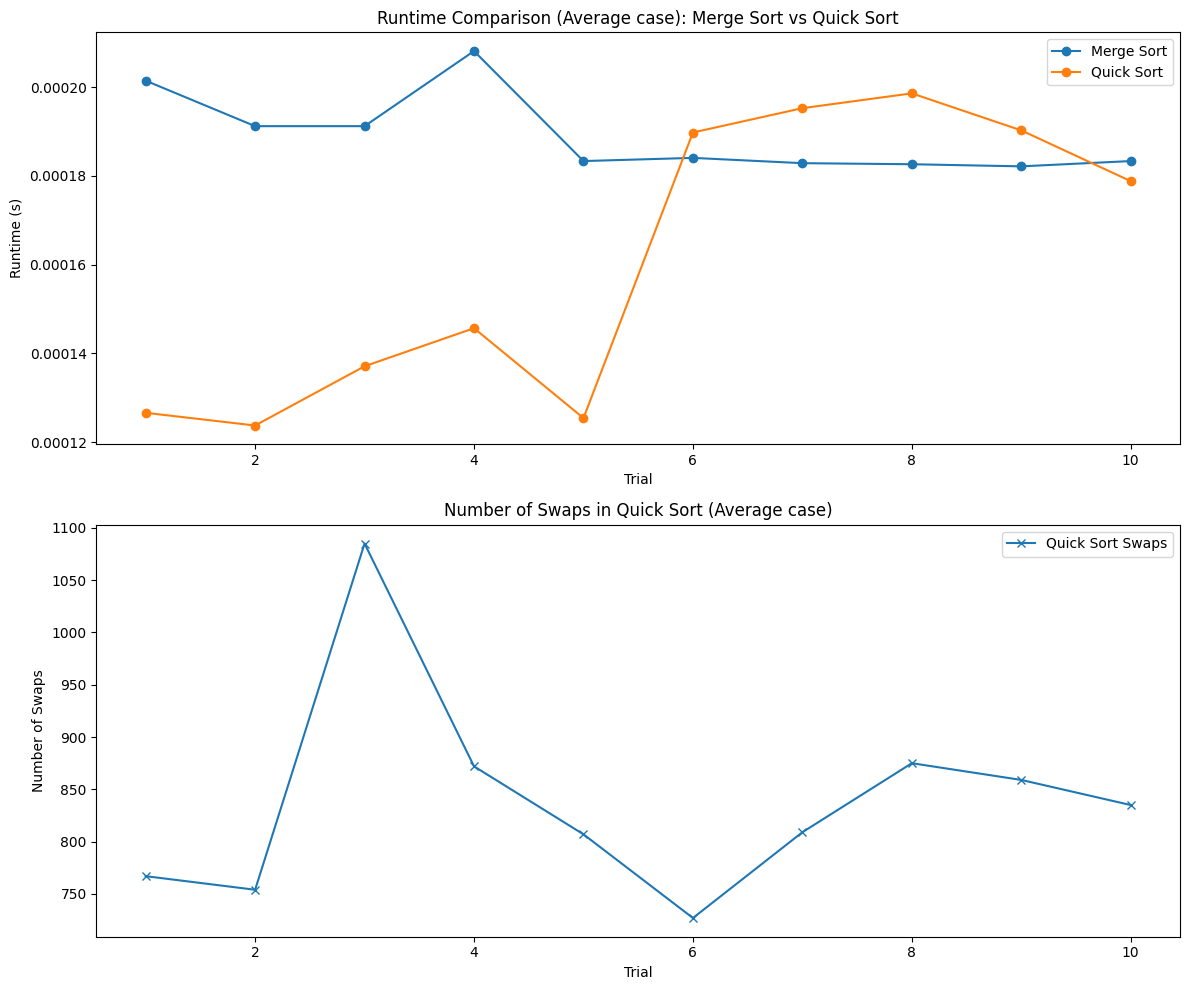

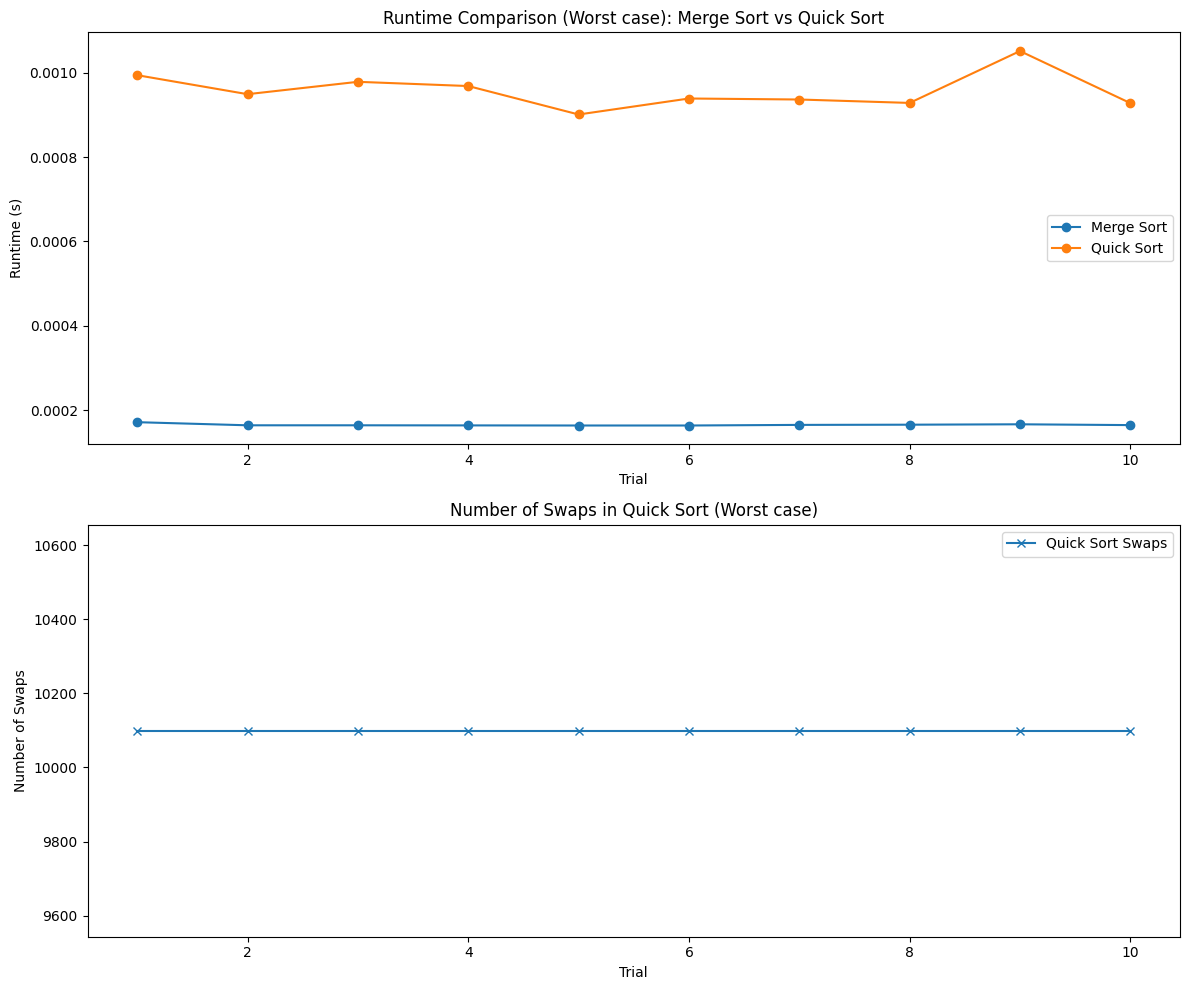

In [29]:
def create_scenario_array(size, scenario):
    if scenario == 'Average':
        return [random.randint(0, size) for _ in range(size)]
    elif scenario == 'Worst':
        return list(range(size, 0, -1))
    elif scenario == 'Best':
        return list(range(1, size + 1))

def run_experiment(sort_func, array_size, scenario, trials):
    times = []
    swap_counts = []
    
    for _ in range(trials):
        data = create_scenario_array(array_size, scenario)
        start_time = time.time()
        swap_count = [0]  # Initialize swap count as a list to be mutable
        if sort_func == quickSort:
            swap_count[0] = sort_func(data, 0, len(data) - 1, swap_count)
            swap_counts.append(swap_count[0])  # Store the total swap count
        else:
            sort_func(data)  # Assuming this is a placeholder for Merge Sort
        end_time = time.time()
        times.append(end_time - start_time)
    
    return times, swap_counts

def plot_results(merge_times, quick_times, swap_counts, scenario):
    plt.figure(figsize=(12, 10))

    # Plotting runtime comparison
    plt.subplot(2, 1, 1)
    trials = range(1, len(merge_times) + 1)
    plt.plot(trials, merge_times, label='Merge Sort', marker='o')
    plt.plot(trials, quick_times, label='Quick Sort', marker='o')
    plt.xlabel('Trial')
    plt.ylabel('Runtime (s)')
    plt.title(f'Runtime Comparison ({scenario} case): Merge Sort vs Quick Sort')
    plt.legend()

    # Plotting swap count for Quick Sort
    plt.subplot(2, 1, 2)
    plt.plot(trials, swap_counts, label='Quick Sort Swaps', marker='x')
    plt.xlabel('Trial')
    plt.ylabel('Number of Swaps')
    plt.title(f'Number of Swaps in Quick Sort ({scenario} case)')
    plt.legend()

    plt.tight_layout()
    plt.show()


def find_comparison_point(merge_times, quick_times, quick_swaps, threshold_ratio=1.25):
    comparison_points = {}
    # Sort the quick sort results by swap count
    sorted_indices = np.argsort(quick_swaps)
    sorted_quick_times = np.array(quick_times)[sorted_indices]
    sorted_merge_times = np.array(merge_times)
    sorted_quick_swaps = np.array(quick_swaps)[sorted_indices]

    # Find the first point where Quick Sort's time is within the threshold ratio of Merge Sort's time
    for i in range(len(sorted_quick_times)):
        if sorted_quick_times[i] <= sorted_merge_times[i] * threshold_ratio:
            comparison_points = {
                'trial': i + 1,
                'swaps': sorted_quick_swaps[i],
                'quick_time': sorted_quick_times[i],
                'merge_time': sorted_merge_times[i]
            }
            break
    return comparison_points
array_size = 200
scenarios = ['Best', 'Average', 'Worst']
trials = 10

# Results storage
merge_sort_results = {scenario: [] for scenario in scenarios}
quick_sort_results = {scenario: [] for scenario in scenarios}
swap_counts = {scenario: [] for scenario in scenarios}

# Run the experiments for each scenario and collect the data
for scenario in scenarios:
    merge_sort_results[scenario], _ = run_experiment(mergeSort, array_size, scenario, trials)
    quick_sort_results[scenario], swap_counts[scenario] = run_experiment(quickSort, array_size, scenario, trials)

comparison_points = {}
for scenario in scenarios:
    comparison_points[scenario] = find_comparison_point(
        merge_sort_results[scenario],  # List of merge sort times for this scenario
        quick_sort_results[scenario],  # List of quick sort times for this scenario
        swap_counts[scenario],         # List of quick sort swap counts for this scenario
        threshold_ratio=1.25           # Threshold ratio to determine "comparable" performance
    )

# Output the comparison points for each scenario
for scenario, points in comparison_points.items():
    if points:  # If a comparison point was found
        print(f"In the {scenario} case, Quick Sort performs comparably to Merge Sort at trial "
              f"{points['trial']} with {points['swaps']} swaps.")
    else:
        print(f"No comparison point found where Quick Sort performs within the threshold ratio for the {scenario} case.")
for scenario in scenarios:
    plot_results(
        merge_sort_results[scenario], 
        quick_sort_results[scenario], 
        swap_counts[scenario], 
        scenario
    )

In this section, provide a detailed outline of:
- The experiments you ran and the rationale behind your worst case scenario.
- The plots showing the run times.

Further explain how you computed the swaps and verify that you calculation is correct, by applying it on a diifferent list under same experimental conditions.

**Reflection**:

---
---

### PART F

Traditionally, Insertion Sort is worst than Heap Sort and Merge Sort. Now that you are a master at critical evaluation of sorting and searching algorithms, design an experiment to show that this may not be universally true. That is, there maybe scenarios where insertion sort is better than merge and heap sort.

HINT: Think about the Best Case of insertion sort.

Again, provide:
- An explicit outline of the experiments you ran. That is, list length values, how many “runs”, etc.
- A graph of list length vs time displaying the appropriate three curves showing. List lengths should be small here.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.
- Reflect on why these are experiments are important. 

HINT: Can you create some sort of "hybrid" sort that would be better?

# Comparative Analysis of Sorting Algorithms

## Experiment Overview

In this experiment, we aim to challenge the traditional view that Insertion Sort is generally inferior to Heap Sort and Merge Sort. We hypothesize that there are specific scenarios, such as nearly sorted arrays, where Insertion Sort may outperform the other two algorithms.

### Experiment Setup

#### Objectives
- To evaluate the performance of Insertion Sort compared to Heap Sort and Merge Sort on nearly sorted arrays.
- To identify conditions under which Insertion Sort might be more efficient than traditionally faster sorting algorithms.

#### Parameters
- **Algorithms**: Insertion Sort, Heap Sort, Merge Sort
- **List Lengths**: Arrays with sizes ranging from 50 to 1000 elements.
- **Number of Runs**: Each sorting operation was repeated 100 times for statistical significance.
- **Array Type**: Nearly sorted arrays, where the last two elements are swapped.

### Execution
- We used a function `create_nearly_sorted_array` to generate nearly sorted arrays for each list length.
- Each algorithm was executed on these arrays, and the average run time was recorded across multiple trials.

### Results Visualization
- **Graph**: The results were plotted on a graph showing the list length versus average run time.
- **Displayed Metrics**: The graph displays three curves, each representing one of the sorting algorithms.

### Discussion and Conclusion
- **Observations**:
  - The graph illustrates that Insertion Sort can be more efficient on nearly sorted arrays, especially as the array size increases.
  - In contrast, Heap Sort and Merge Sort did not benefit significantly from the nearly sorted nature of the arrays.
- **Conclusion**:
  - Insertion Sort can be a preferable choice for sorting nearly sorted arrays, particularly when dealing with small to medium-sized datasets.
  - These findings challenge the conventional wisdom and show that the choice of sorting algorithm should consider the nature of the dataset.

### Reflection on Experiment Importance
- **Hybrid Sorting Algorithms**:
  - This experiment opens up possibilities for designing "hybrid" sorting algorithms that could combine the strengths of different sorting techniques.
  - For instance, an algorithm could use Insertion Sort for nearly sorted segments within a larger dataset and switch to Merge Sort or Heap Sort for more randomly ordered segments.
- **Practical Implications**:
  - Understanding these nuances in sorting algorithm performance can lead to more efficient data processing in real-world applications where datasets might not be completely random.



In [61]:
def insertionSort(arr):
    """Sorts an array using the insertion sort algorithm."""
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key


def create_nearly_sorted_array(size):
    """Creates a nearly sorted array of a given size."""
    arr = [i for i in range(size)]  # Using a generator expression
    arr[-1], arr[-2] = arr[-2], arr[-1]  # Swap last two elements
    return arr

def execute_experiments(sorting_algorithms, list_lengths, num_trials):
    """Executes sorting experiments for each algorithm and returns results."""
    results = {alg: [] for alg in sorting_algorithms}
    for length in list_lengths:
        for alg_name, sort_func in sorting_algorithms.items():
            avg_time = np.mean([run_sorting_algorithm(sort_func, create_nearly_sorted_array(length)) for _ in range(num_trials)])
            results[alg_name].append(avg_time)
    return results


list_lengths = [50, 75, 100, 200, 600, 800, 1000]
num_trials = 100
sorting_algorithms = {'InsertionSort': insertionSort, 'HeapSort': heapSort, 'MergeSort': mergeSort}

results = execute_experiments(sorting_algorithms, list_lengths, num_trials)


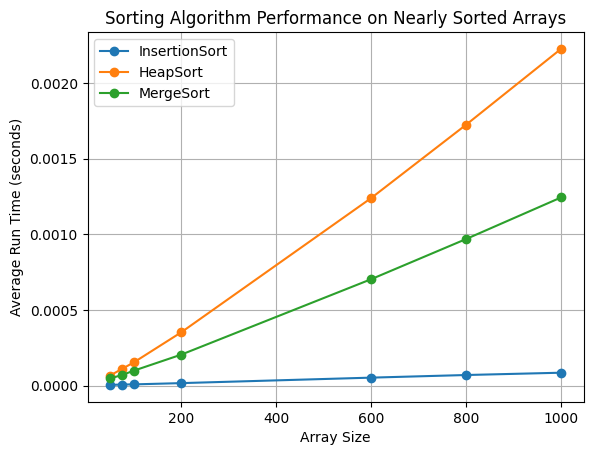

In [62]:
# Experiments for nearly sorted arrays

for alg_name, times in results.items():
    plt.plot(list_lengths, times, marker='o', label=alg_name)

plt.xlabel('Array Size')
plt.ylabel('Average Run Time (seconds)')
plt.title('Sorting Algorithm Performance on Nearly Sorted Arrays')
plt.legend()
plt.grid(True)
plt.show()


**Reflection**:

---
---

**Team Contributions**: In below section describe in detail how you distributed the workload and contributions of each member in the task.

### Ankur Pandey (pandea23) = Part A and B 
### Aarav Pant (panta3) = Part C and D
### Megh Joshi (joshim20) = Part E and F

---
---